### Research Question

<i><a href="https://kiraplastinina.ru/">Kira Plastinina</a> is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.</i>

1. Perform clustering stating insights drawn from your analysis and visualizations.
2. Upon implementation, provide comparisons between the approaches learned this week i.e. K-Means clustering vs Hierarchical clustering highlighting the strengths and limitations of each approach in the context of your analysis. 

Your findings should help inform the team in formulating the marketing and sales strategies of the brand. 

You will create a Markdown which will comprise the following sections. 

1. Problem Definition
2. Data Sourcing
3. Check the Data
4. Perform Data Cleaning
5. Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
6. Implement the Solution
7. Challenge the Solution
8. Follow up Questions

The dataset for this Independent project can be found <a href="http://bit.ly/EcommerceCustomersDataset">here</a> 

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.
- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
- The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
- The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
- The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [59]:
# data.new<- data[, c(1, 2, 3, 4)]
# data.class<- data[, "Revenue"]
# head(data.new)

#### Load Dataset

In [60]:
data <- read.csv("online_shoppers_intention.csv")
head(data)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [61]:
# different types of pages visited by the visitor in that session and total time spent in each of these page categories.
pages_visited <- data[, c(1,2,3,4,5,6)]
names(pages_visited)

[1] "Administrative"          "Administrative_Duration"
[3] "Informational"           "Informational_Duration" 
[5] "ProductRelated"          "ProductRelated_Duration"

In [62]:
#metrics measured by "Google Analytics" for each page in the e-commerce site.
metrics <- data[, c(7,8,9)]
names(metrics)

[1] "BounceRates" "ExitRates"   "PageValues"

In [63]:
names(data)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

#### Explore Dataset

##### Summary, information and dimension


In [64]:
# Summary of the dataset
summary(data)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

Aside from summary we can use a more complete function is the <span class="girk">skim()</span> function from the <span class="girk">“skimr” package</span>. 

It breaks down the variables by type with relevant summary information.

In [65]:
library(skimr)
skim(data)

-- Data Summary ------------------------
                           Values
Name                       data  
Number of rows             12330 
Number of columns          18    
_______________________          
Column type frequency:           
  factor                   2     
  logical                  2     
  numeric                  14    
________________________         
Group variables            None  

-- Variable type: factor -------------------------------------------------------
# A tibble: 2 x 6
  skim_variable n_missing complete_rate ordered n_unique
* <chr>             <int>         <dbl> <lgl>      <int>
1 Month                 0             1 FALSE         10
2 VisitorType           0             1 FALSE          3
  top_counts                                
* <chr>                                     
1 May: 3364, Nov: 2998, Mar: 1907, Dec: 1727
2 Ret: 10551, New: 1694, Oth: 85            

-- Variable type: logical --------------------------------------------------

In [66]:
# information about the dataset
str(data)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

In [67]:
# dimension of the dataset
dim(data)

[1] 12330    18

We have 12330 rows and 18 columns in our dataset

In [68]:
table(data$VisitorType)


      New_Visitor             Other Returning_Visitor 
             1694                85             10551 

In [69]:
table(data$Month)


 Aug  Dec  Feb  Jul June  Mar  May  Nov  Oct  Sep 
 433 1727  184  432  288 1907 3364 2998  549  448 

In [70]:
table(data$TrafficType)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2451 3913 2052 1069  260  444   40  343   42  450  247    1  738   13   38    3 
  17   18   19   20 
   1   10   17  198 

<b>Convert variables to correct datatypes</b>

In [71]:
# Convert to factors
b = c("OperatingSystems", "Browser", "Region", "TrafficType")
for (i in b) {
    data[, i] = as.factor(data[, i])
}

#### Data Cleaning

##### Missing Values

In [72]:
# Total missing values in each column 
# by using the function colSums()

colSums(is.na(data))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

<b>Visualize missing data</b>

In [73]:
library(naniar)

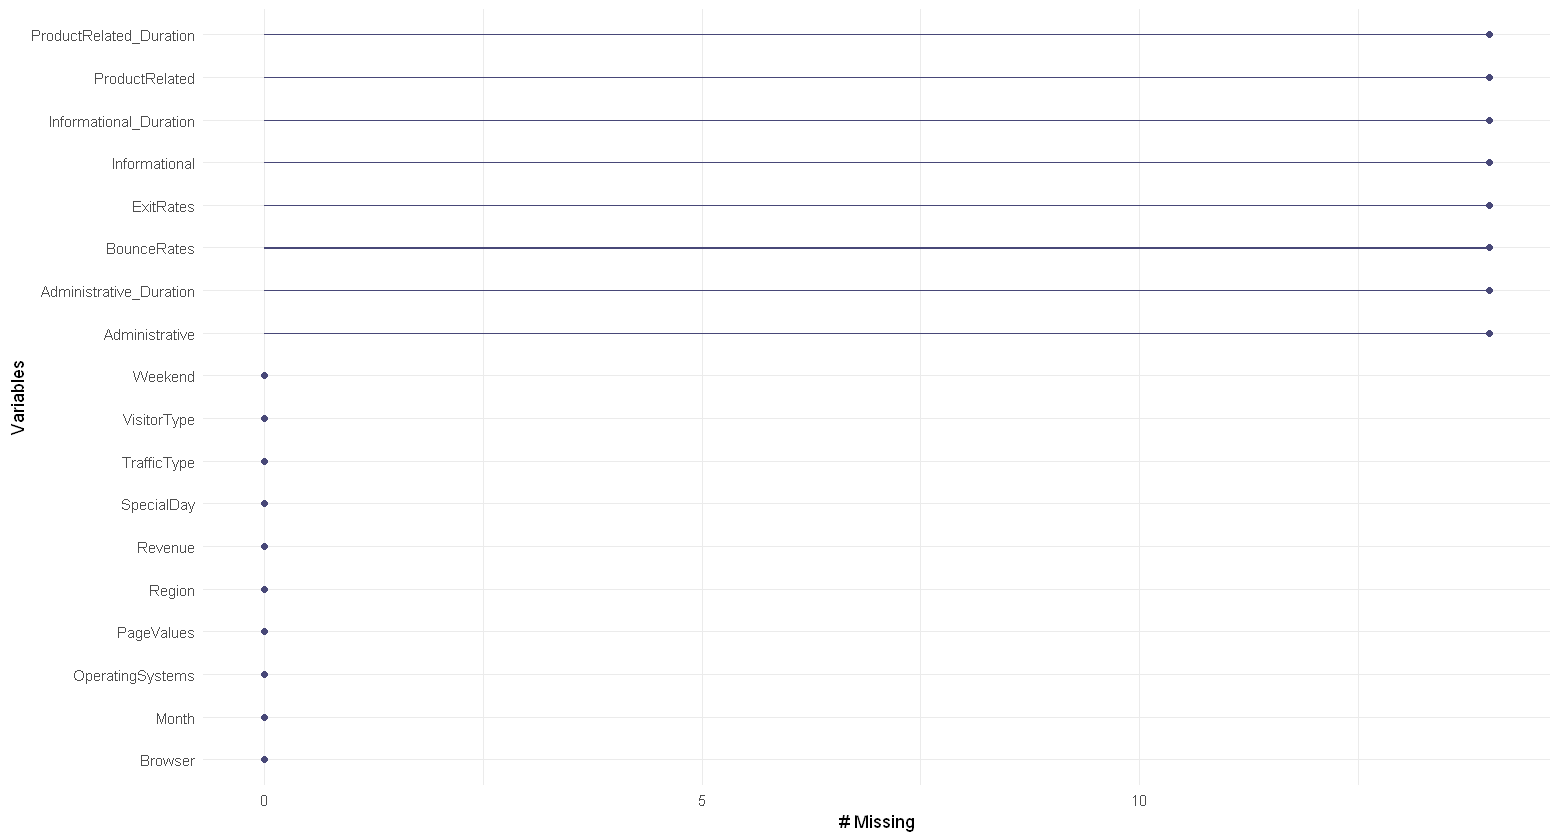

In [74]:
gg_miss_var(data)

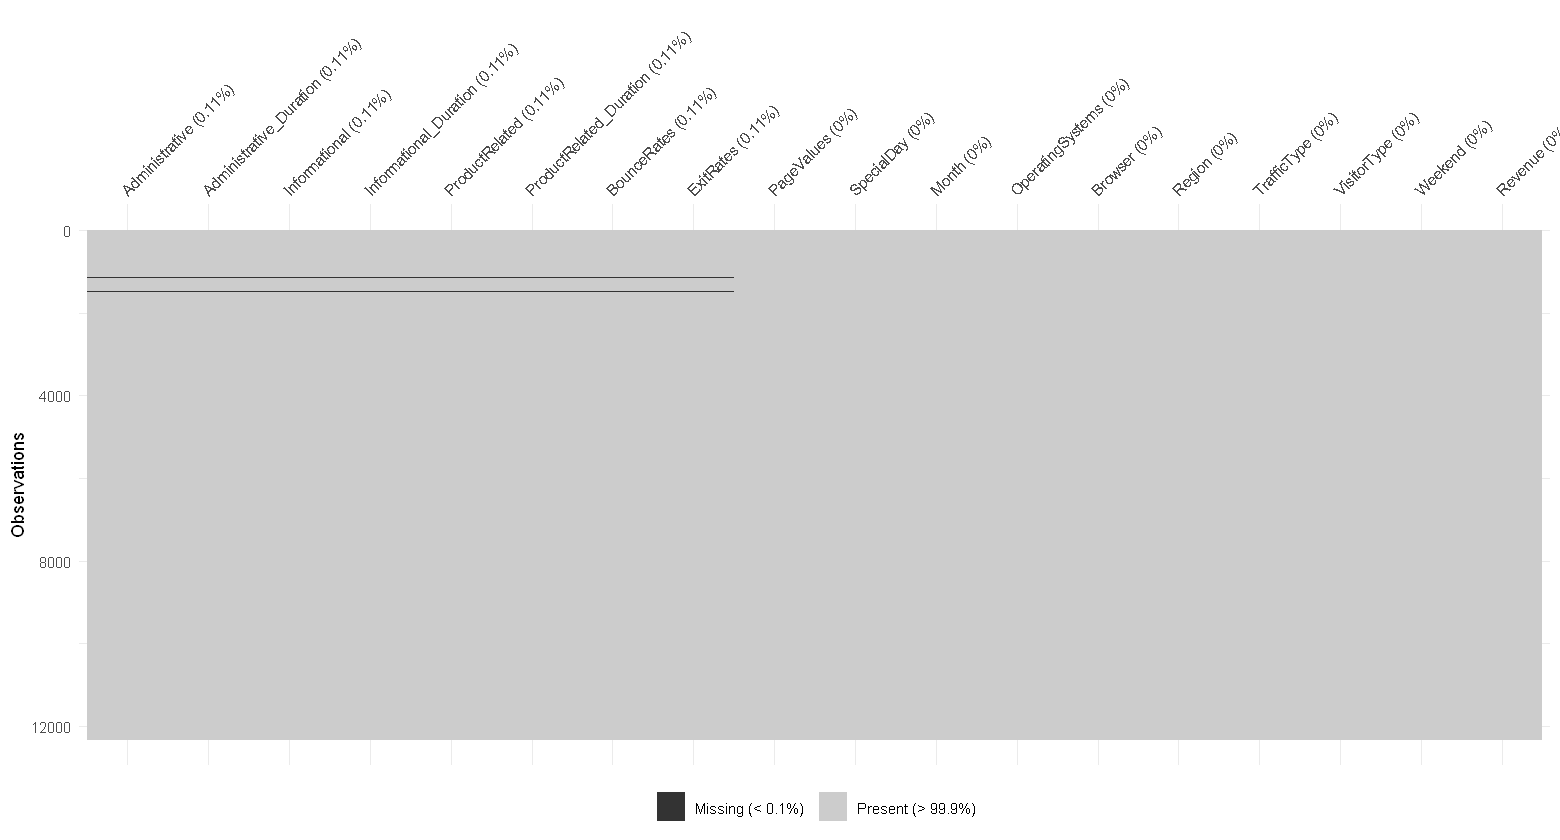

In [75]:
vis_miss(data)

We observe that our data has less 0.1% of missing data which is little and thus can be dropped

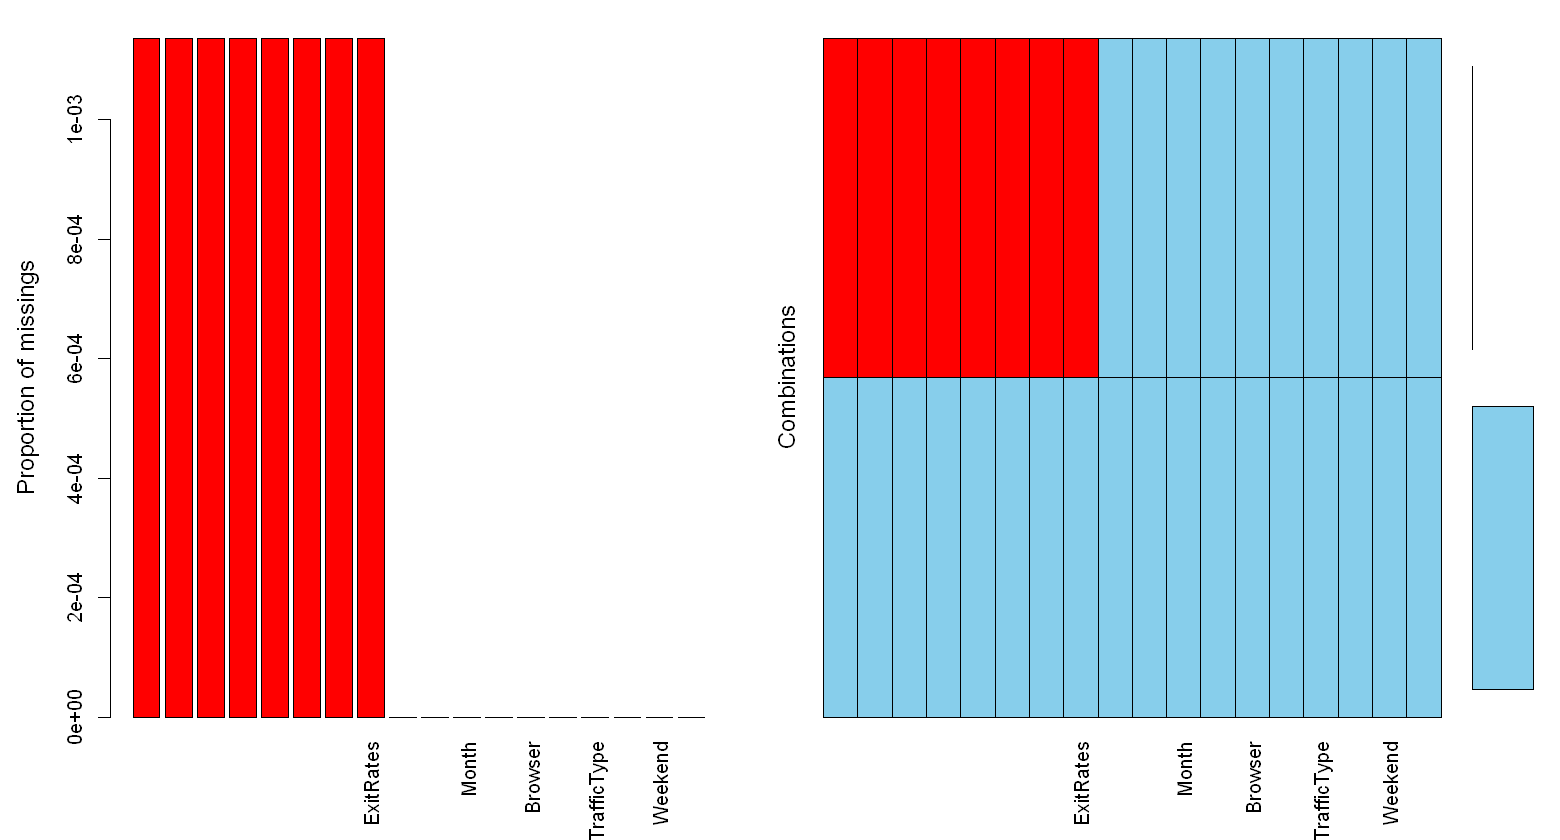

In [76]:
# VIM library for using 'aggr'
library(VIM)

# 'aggr' plots the amount of missing/imputed values in each column
aggr(data)

In [77]:
# Remove missing values
data <- na.omit(data) 

# confirm the values have been dropped
colSums(is.na(data))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

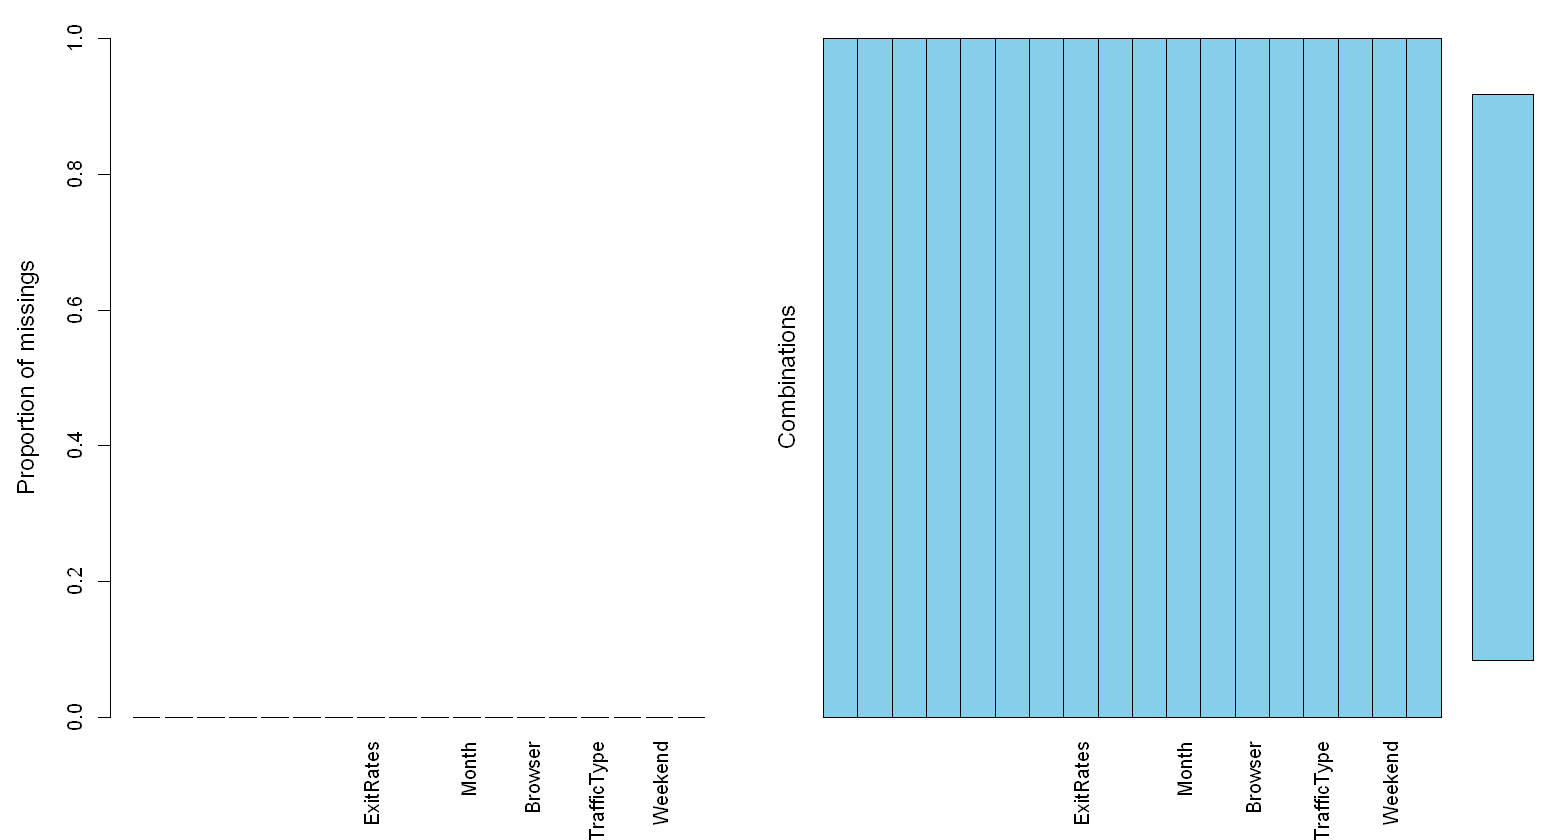

In [78]:
aggr(data)

All missing values have been dropped

##### Duplicated rows

In [79]:
# duplicated rows in the dataset df 
# and assign to a variable duplicated_rows

duplicated_rows <- data[duplicated(data),]

# Lets print out the variable duplicated_rows and see these duplicated rows 

dim(duplicated_rows)

[1] 117  18

We have 117 duplicated rows in our dataset

In [80]:
# pick the non-duplicated rows
data = data[!duplicated(data), ]
dim(data)

[1] 12199    18

The data now contains the non-duplicated rows leaving us with 12199 rows and 18 columns

##### Outliers

In [81]:
# Subset your data to numerical columns only
num <- data[, c(1,2,3,4,5,6,7,8,9,10)]

In [82]:
names(num)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"

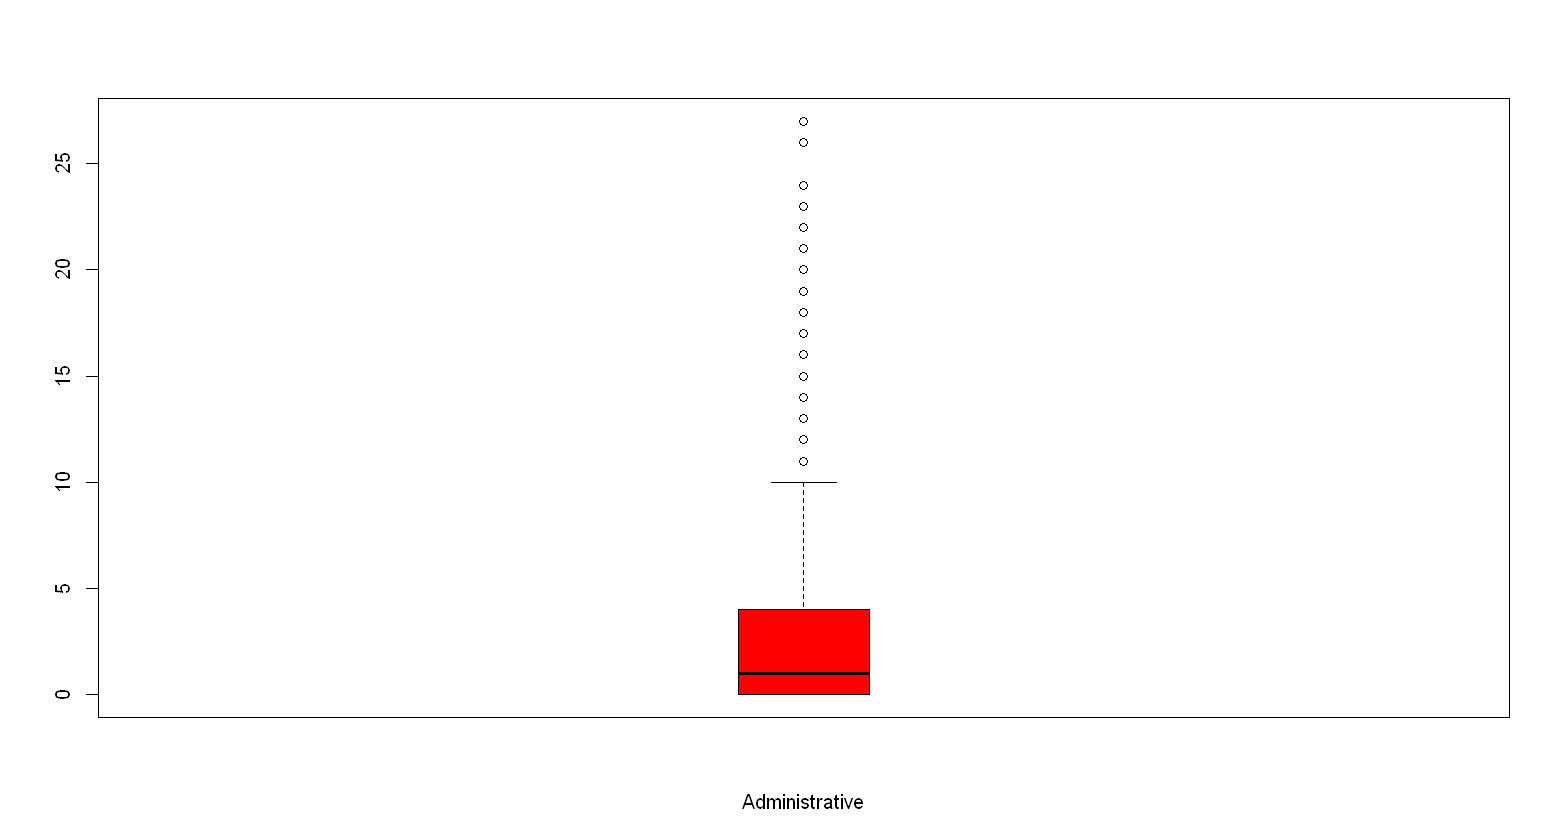

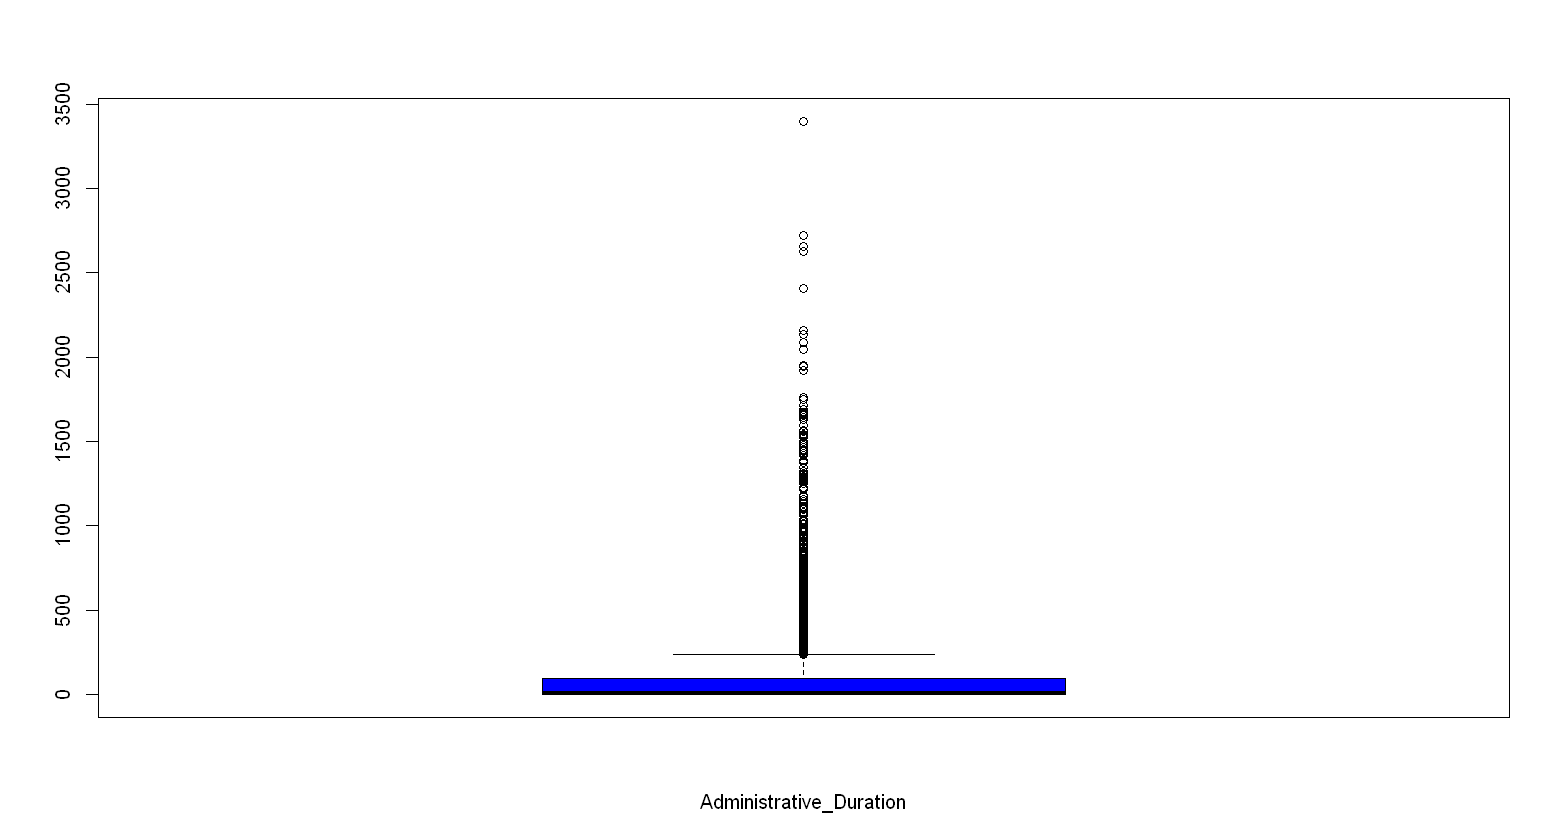

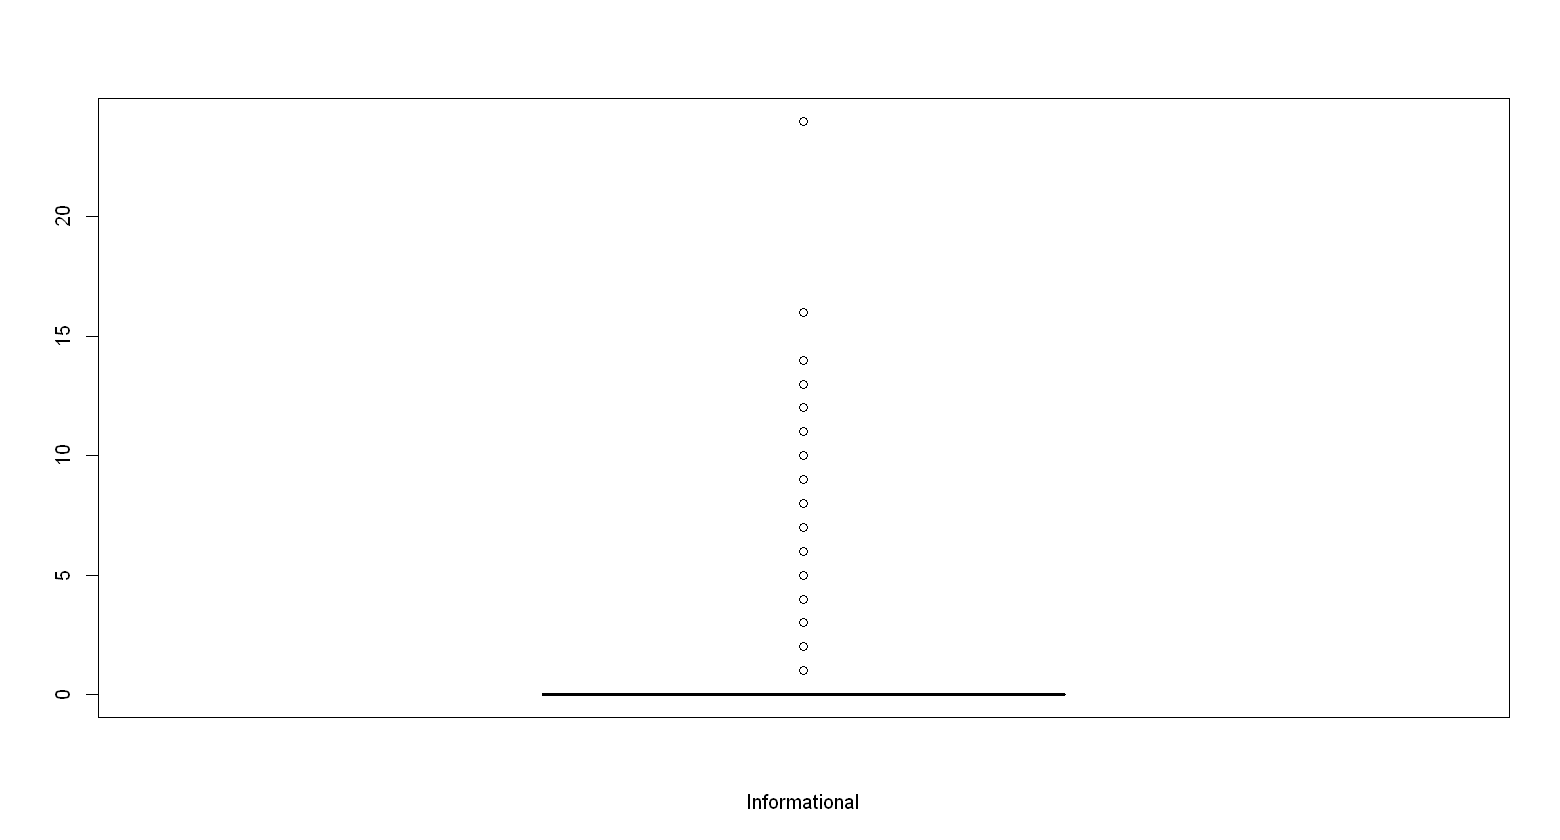

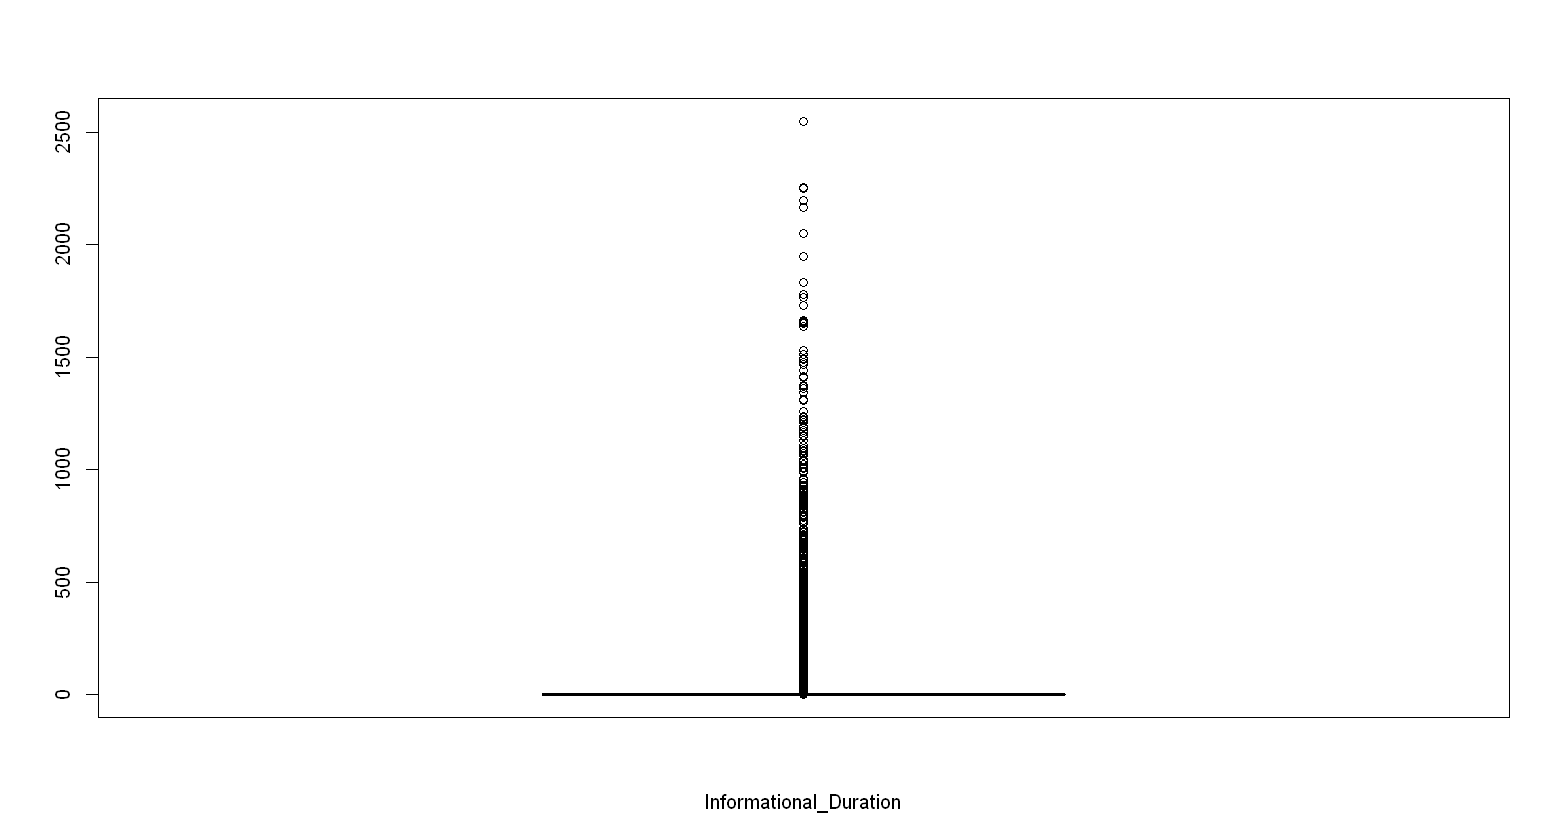

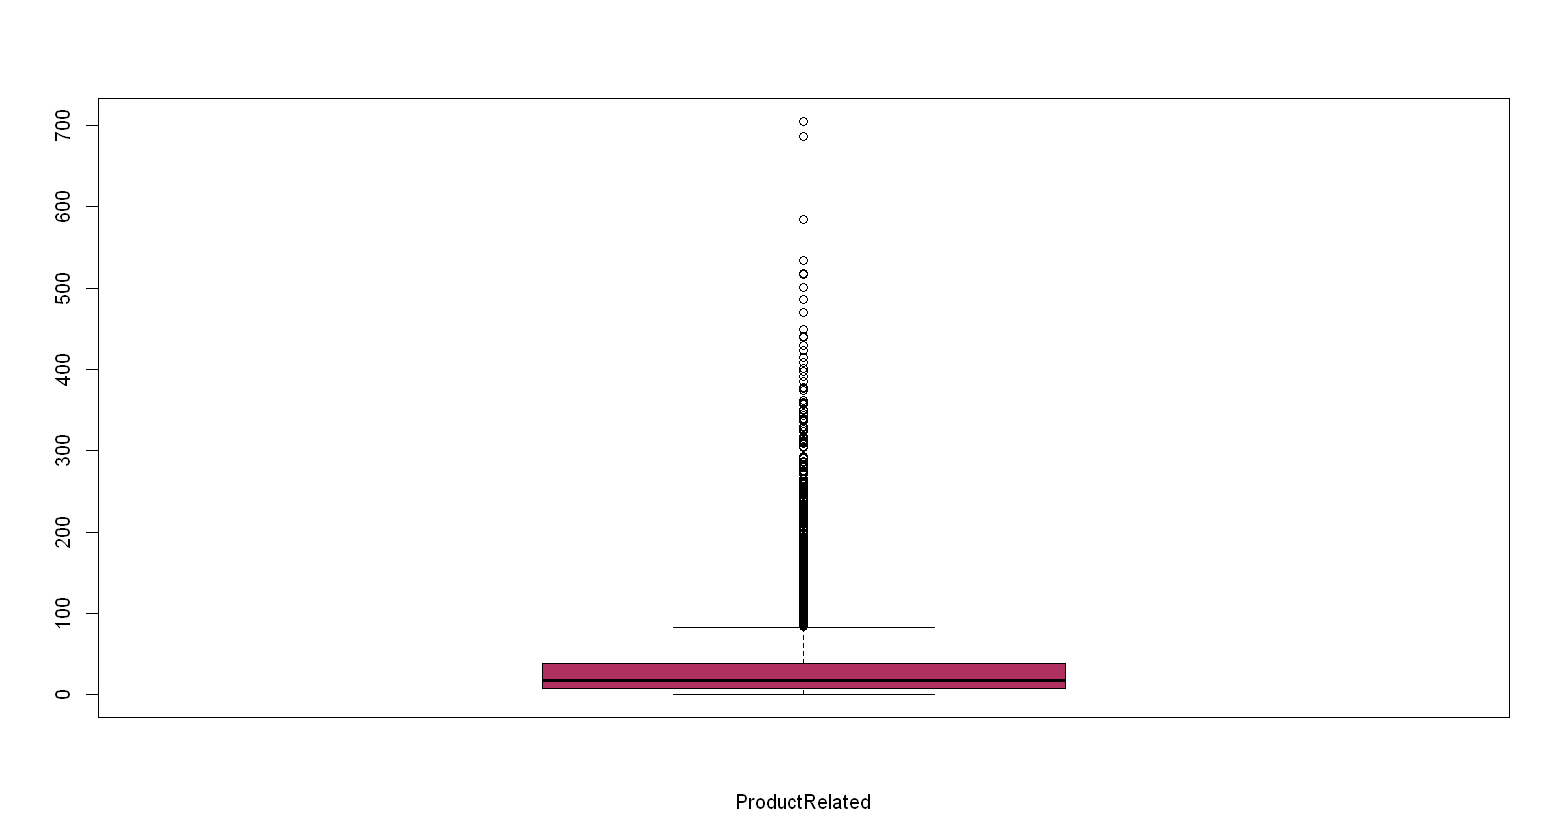

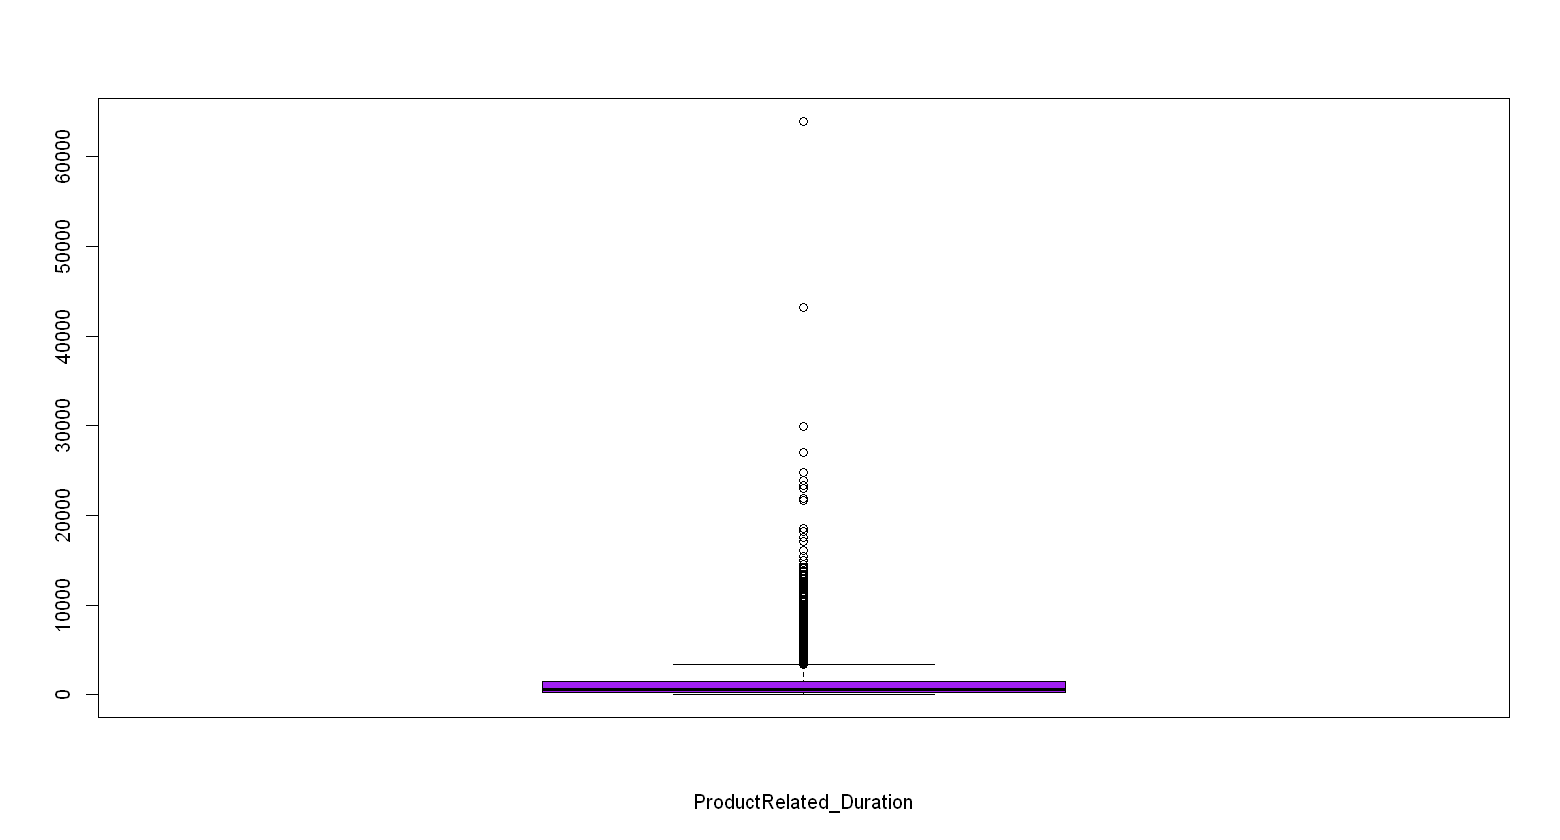

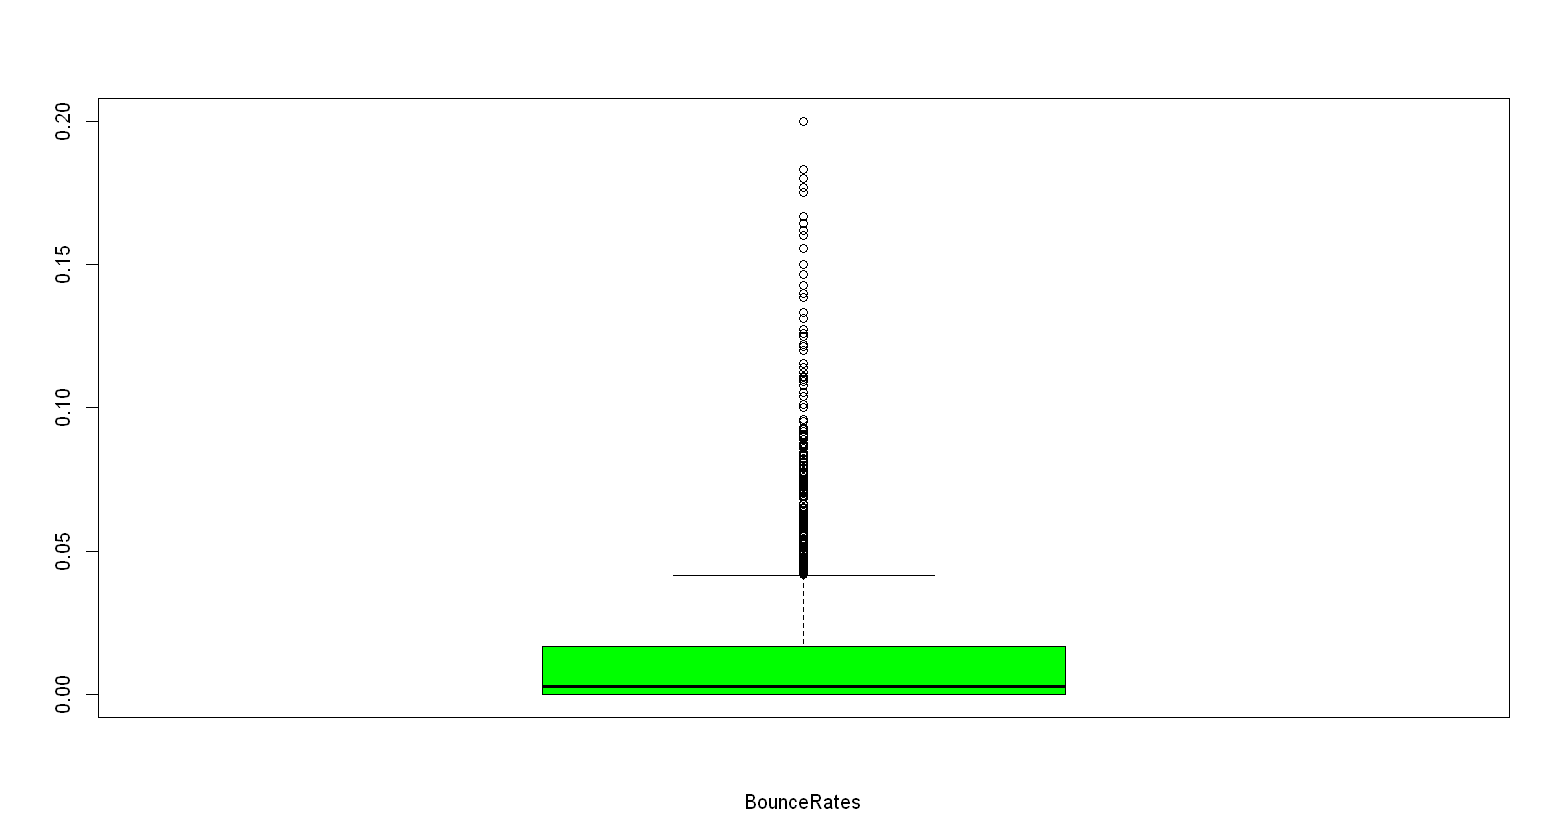

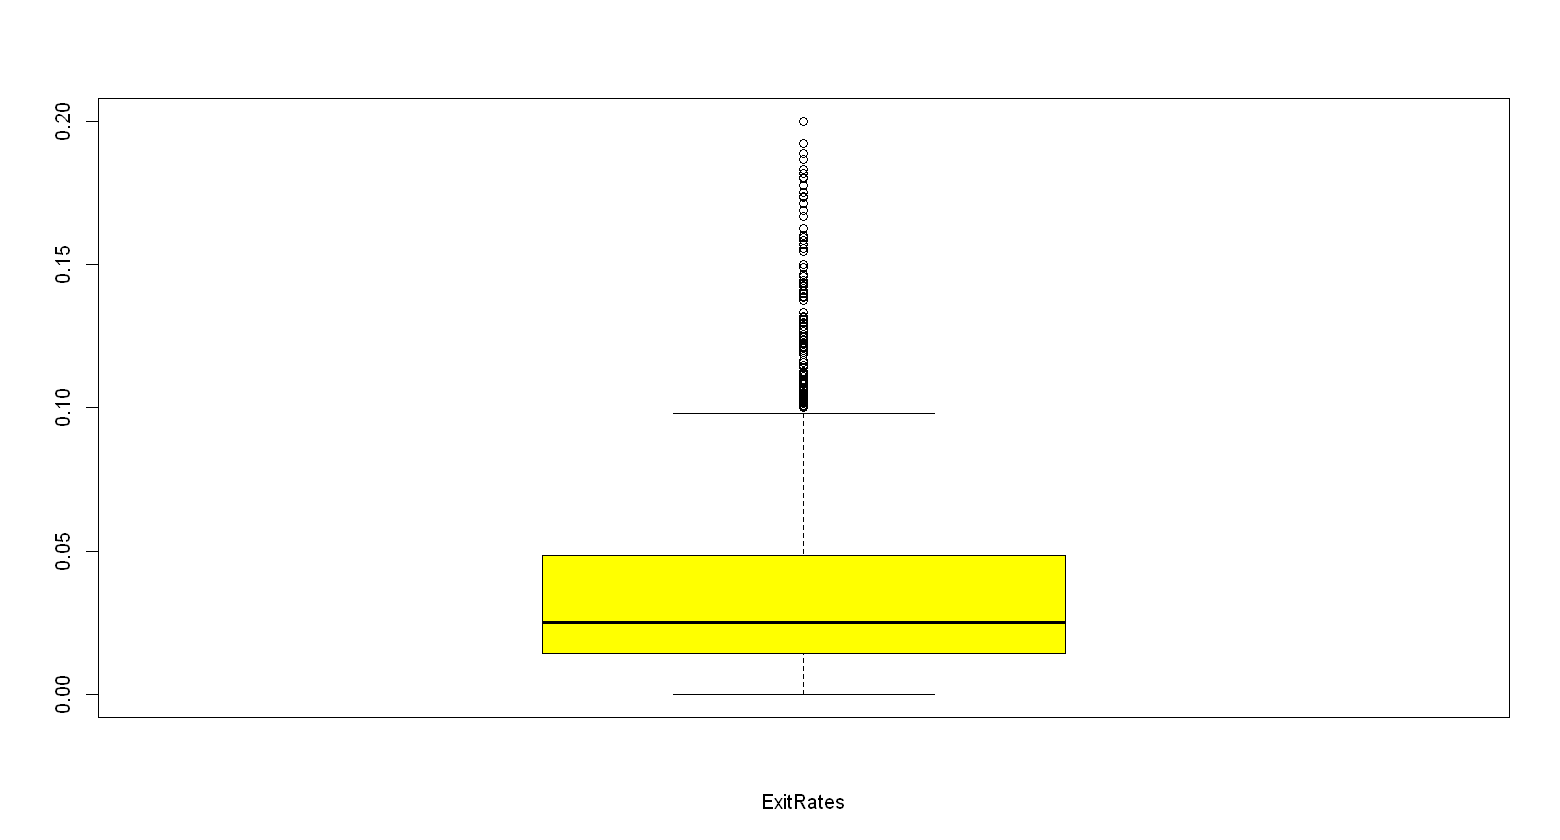

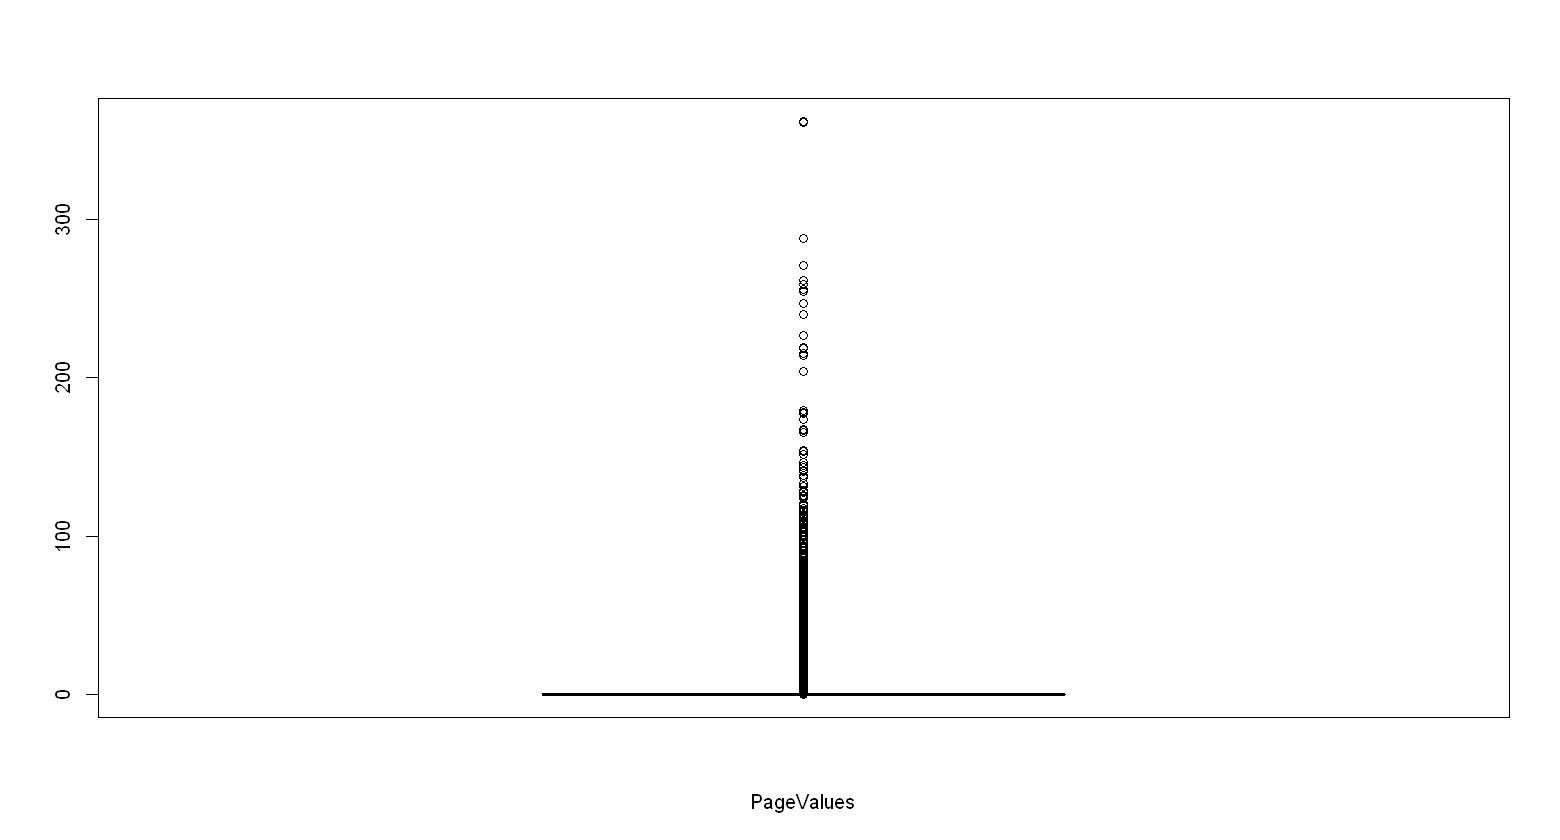

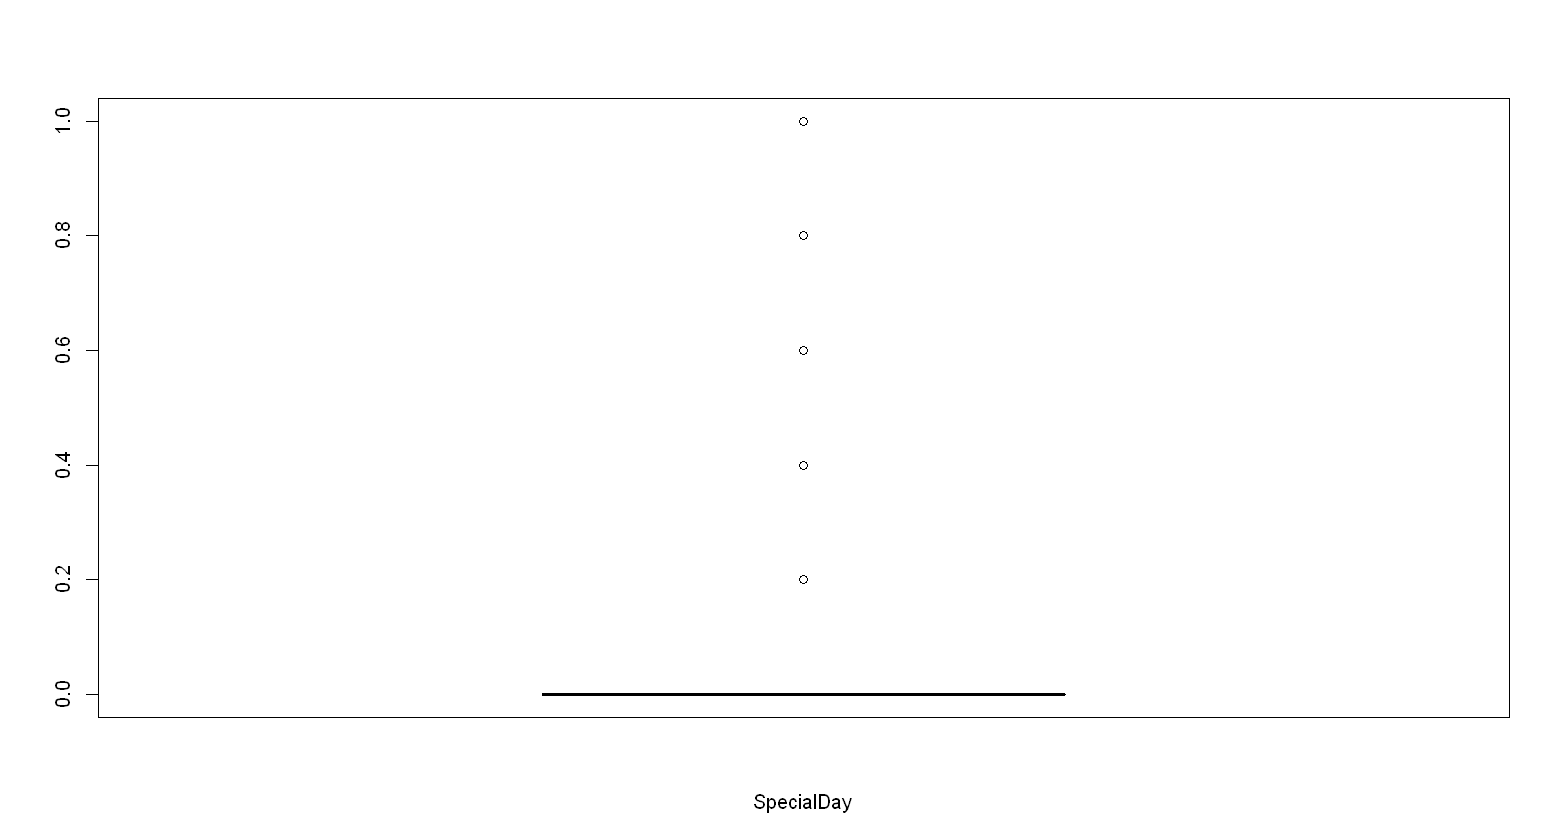

In [83]:
#checking for outlAdministrativeiers
boxplot(num$Administrative,col = "red",xlab ='Administrative', boxwex=0.2)
boxplot(num$Administrative_Duration,col = "blue",xlab = 'Administrative_Duration')
boxplot(num$Informational,col = "sienna",xlab = 'Informational')
boxplot(num$Informational_Duration,col = "yellow",xlab = 'Informational_Duration')
boxplot(num$ProductRelated,col = "maroon",xlab = 'ProductRelated')
boxplot(num$ProductRelated_Duration,col = "purple",xlab = 'ProductRelated_Duration')
boxplot(num$BounceRates,col = "green",xlab = 'BounceRates')
boxplot(num$ExitRates,col = "yellow",xlab = 'ExitRates')
boxplot(num$PageValues,col = "cyan",xlab = 'PageValues')
boxplot(num$SpecialDay,col = "pink",xlab = 'SpecialDay')

We observe that <span class="girk">ProductRelated_Duration column</span> has the most outliers

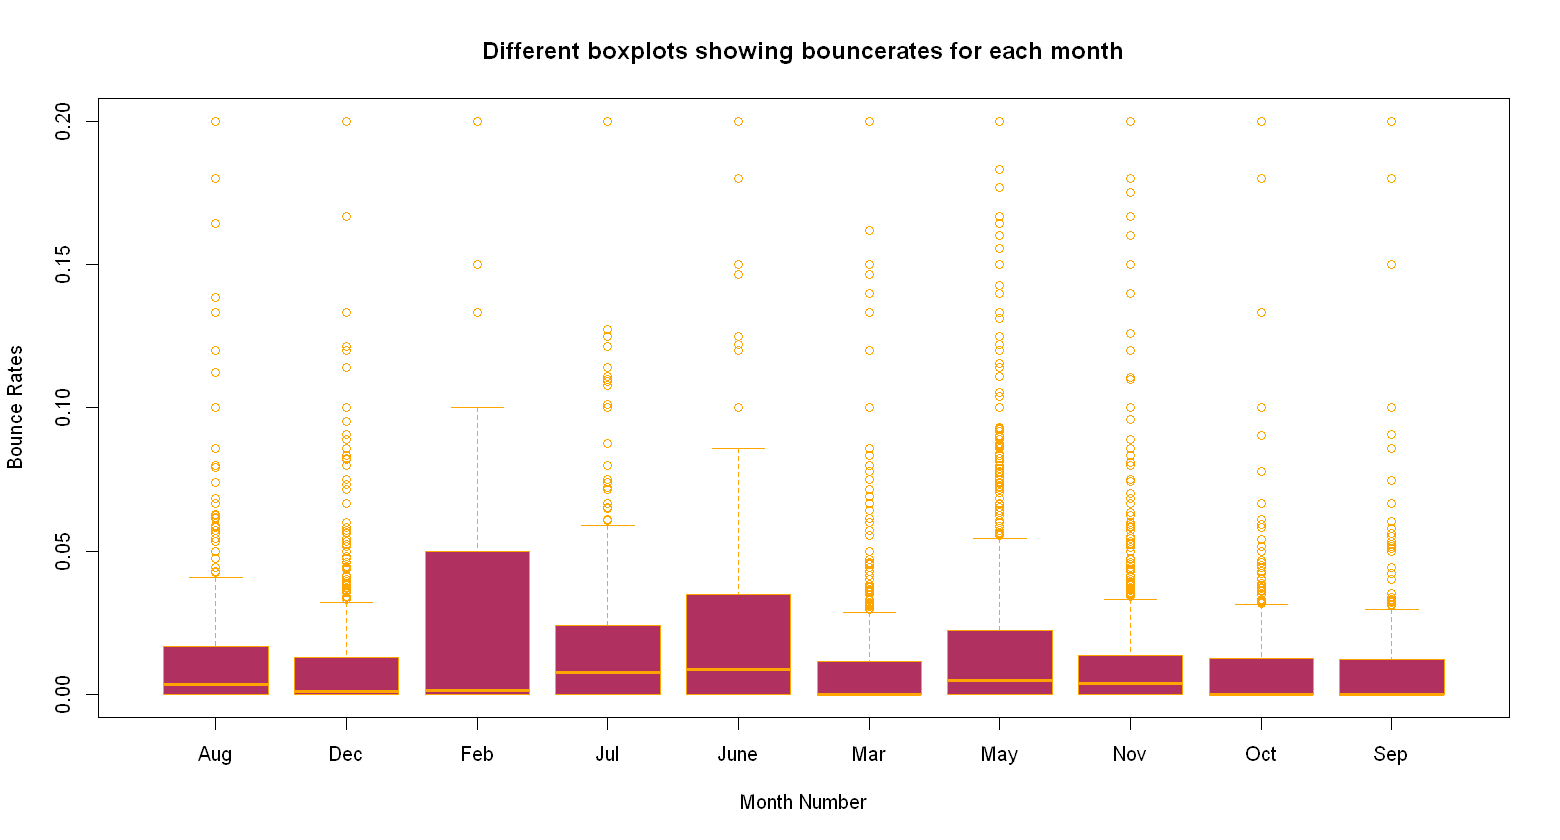

In [84]:
boxplot(BounceRates~Month,
data=data,
main="Different boxplots showing bouncerates for each month",
xlab="Month Number",
ylab="Bounce Rates",
col="maroon",
border="orange"
)

#### Exploratory Data Analysis
##### Univariate Analysis
###### Histograms

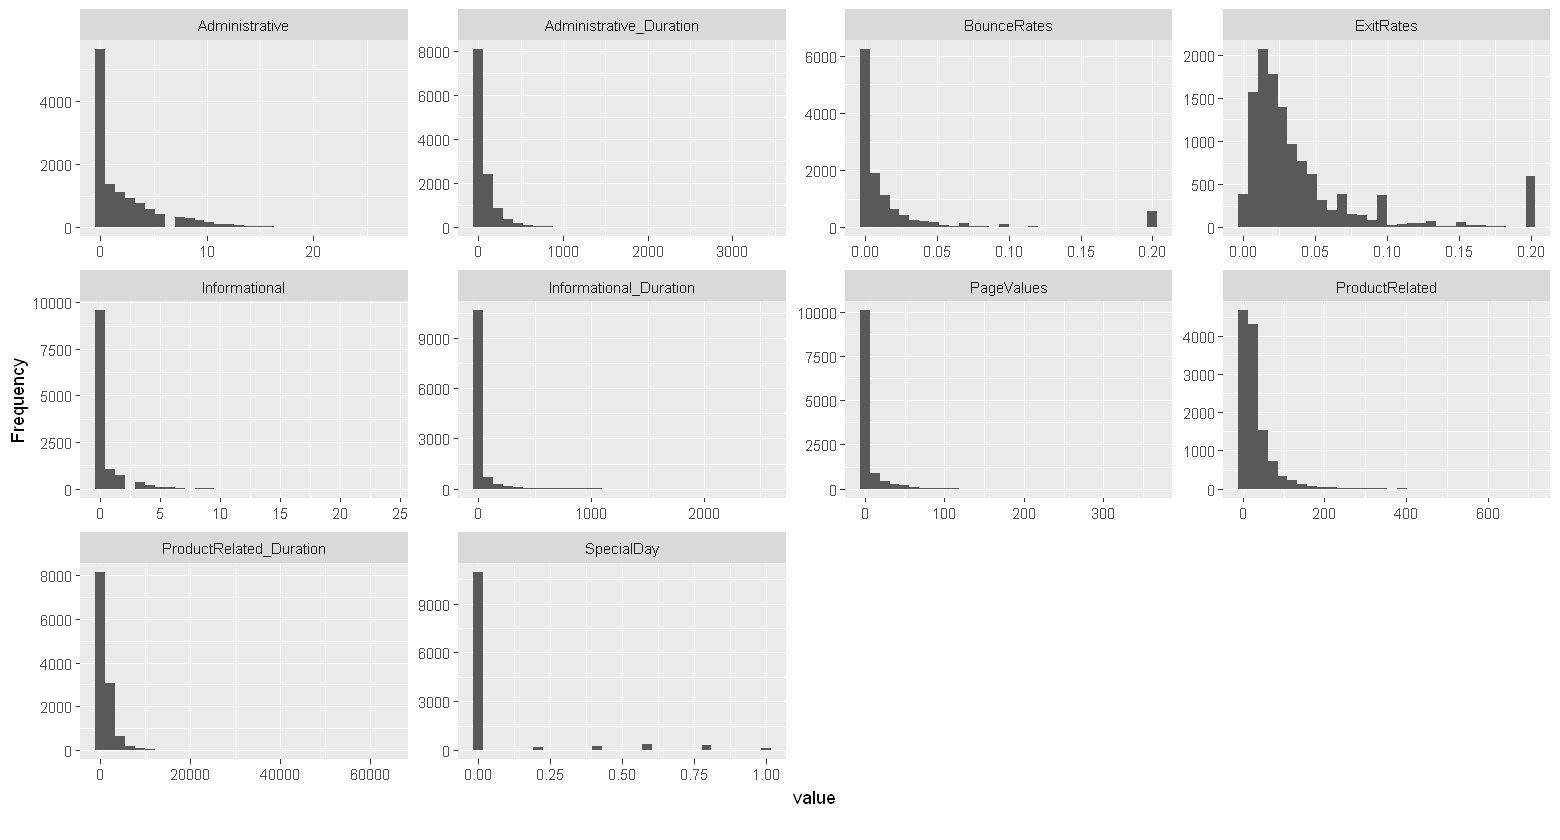

In [85]:
# Histograms
library(DataExplorer)
plot_histogram(data)

Most of the variables are skewed to the left

<b>DIstribution of Categorical columns</b>

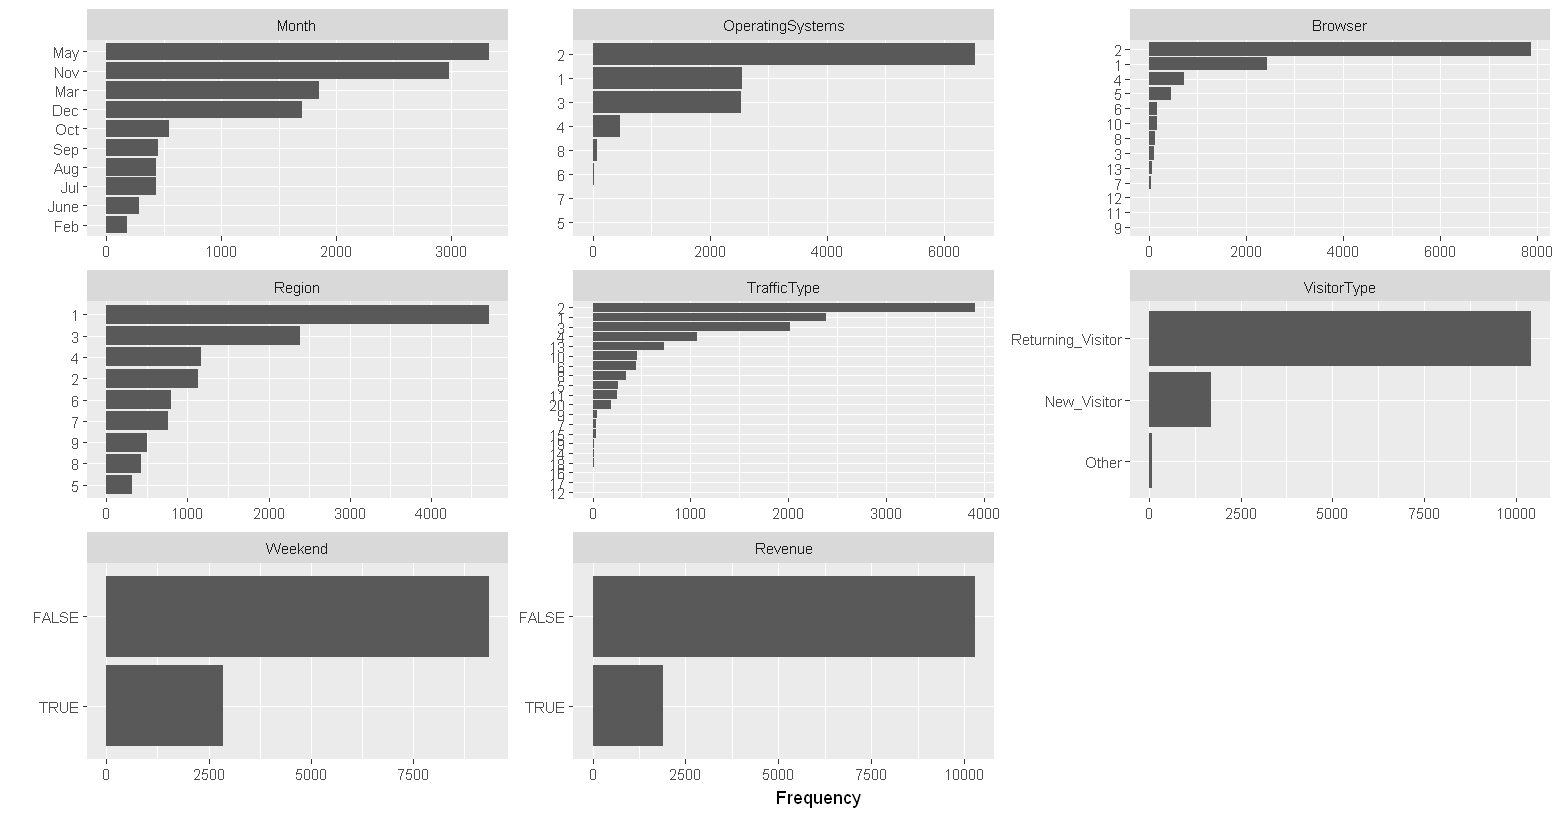

In [86]:
plot_bar(data)

In [87]:
# Summary of the bounce rates
summary(data$BounceRates)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00293 0.02045 0.01667 0.20000 

###### Pie Charts

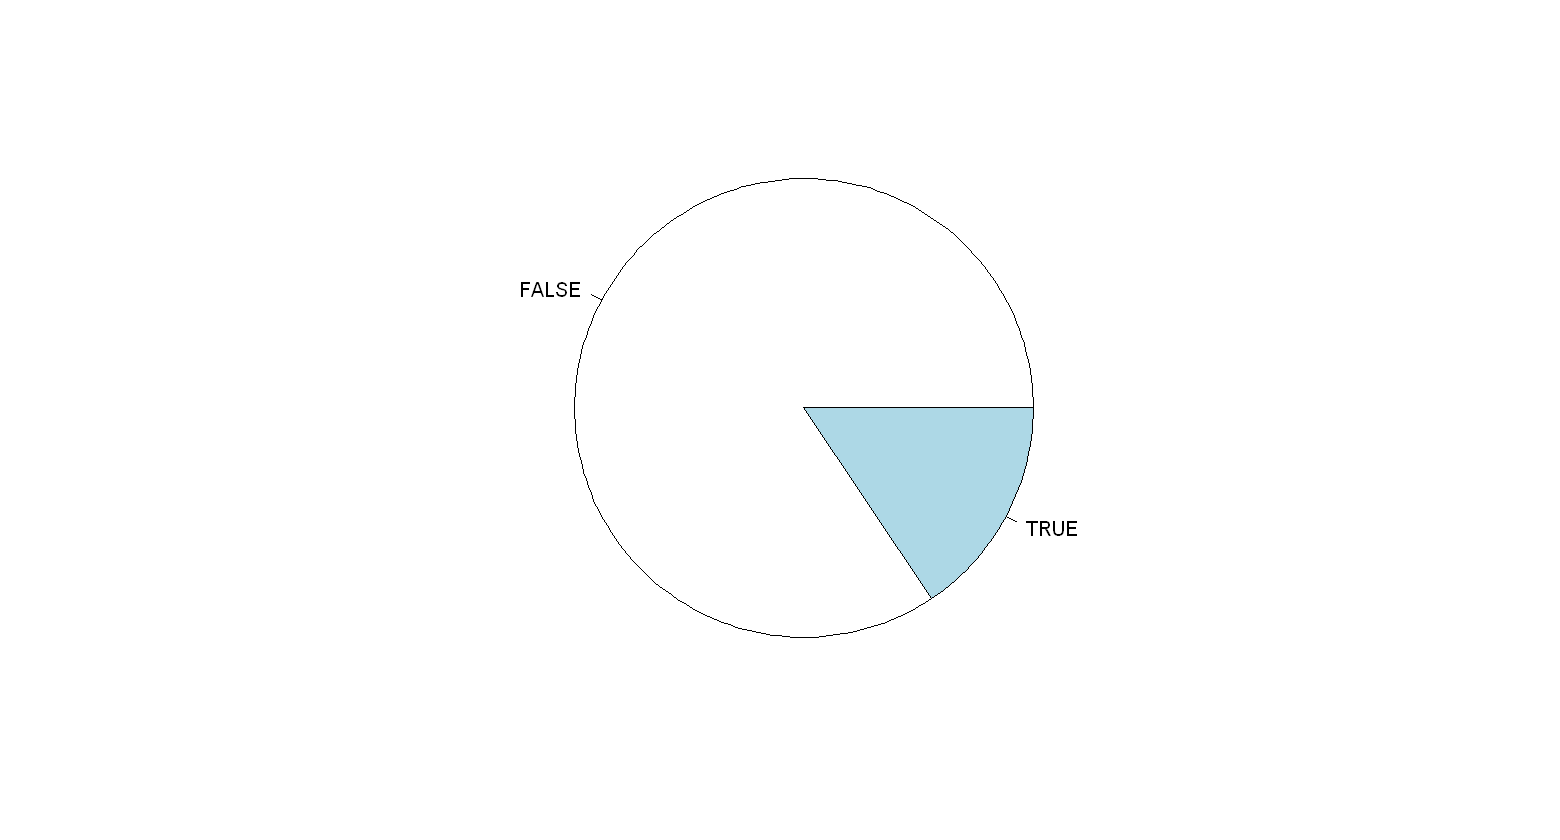

In [88]:
#Pie Chart
library(DataExplorer)

# colors = c("orange", "blue")
pie(table(data$Revenue))

Most of the revenue is false as compared to true

##### Bivariate Analysis

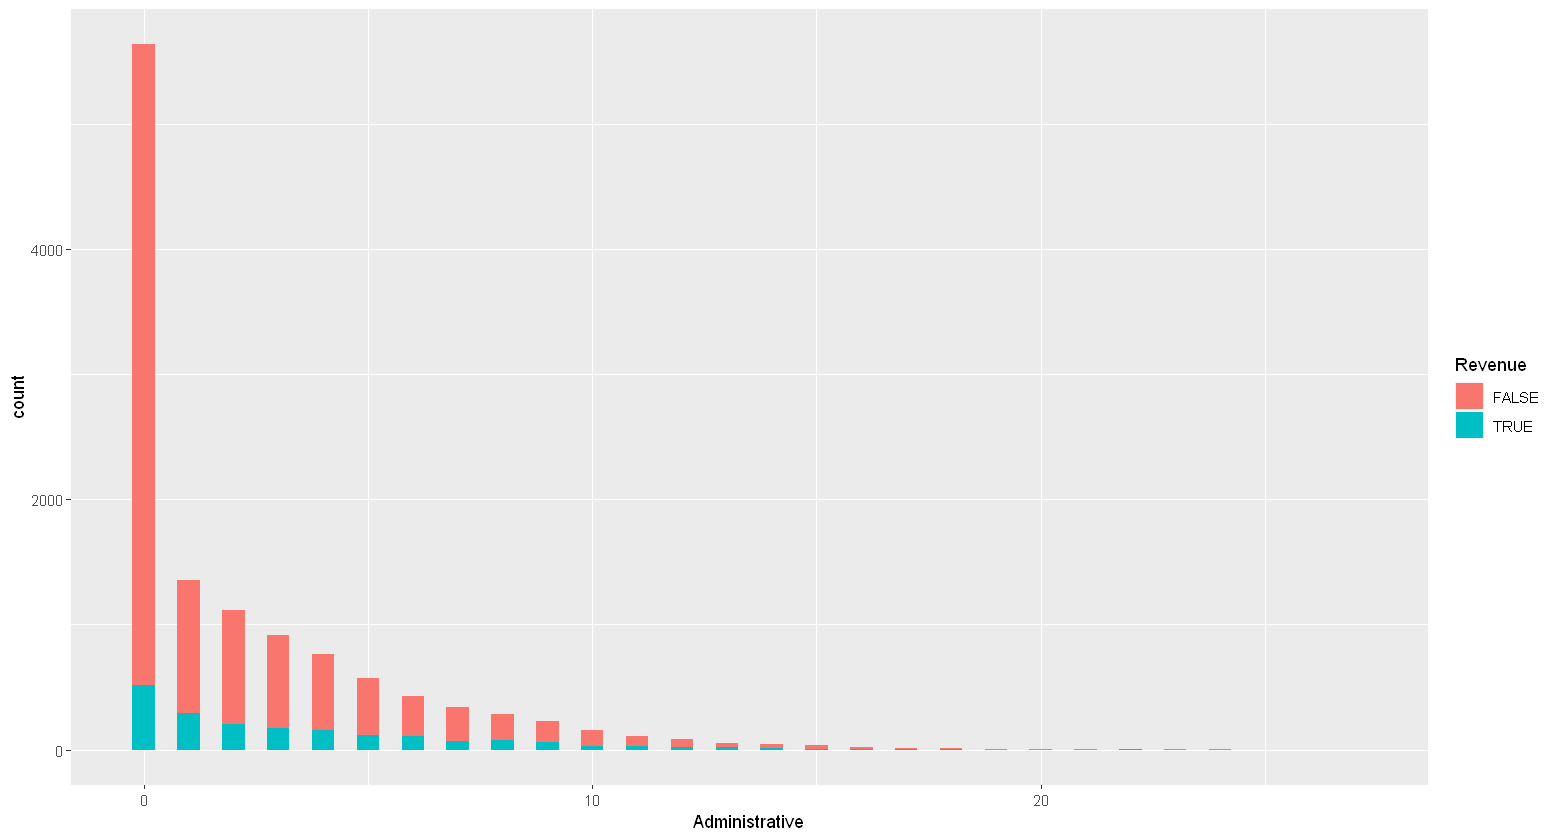

In [120]:
# 
#
library(ggplot2)

j = ggplot(data = data, aes(x = Administrative , fill = Revenue))+ 
geom_bar(width = 0.5)
j

For every administrative count the false revenue were more

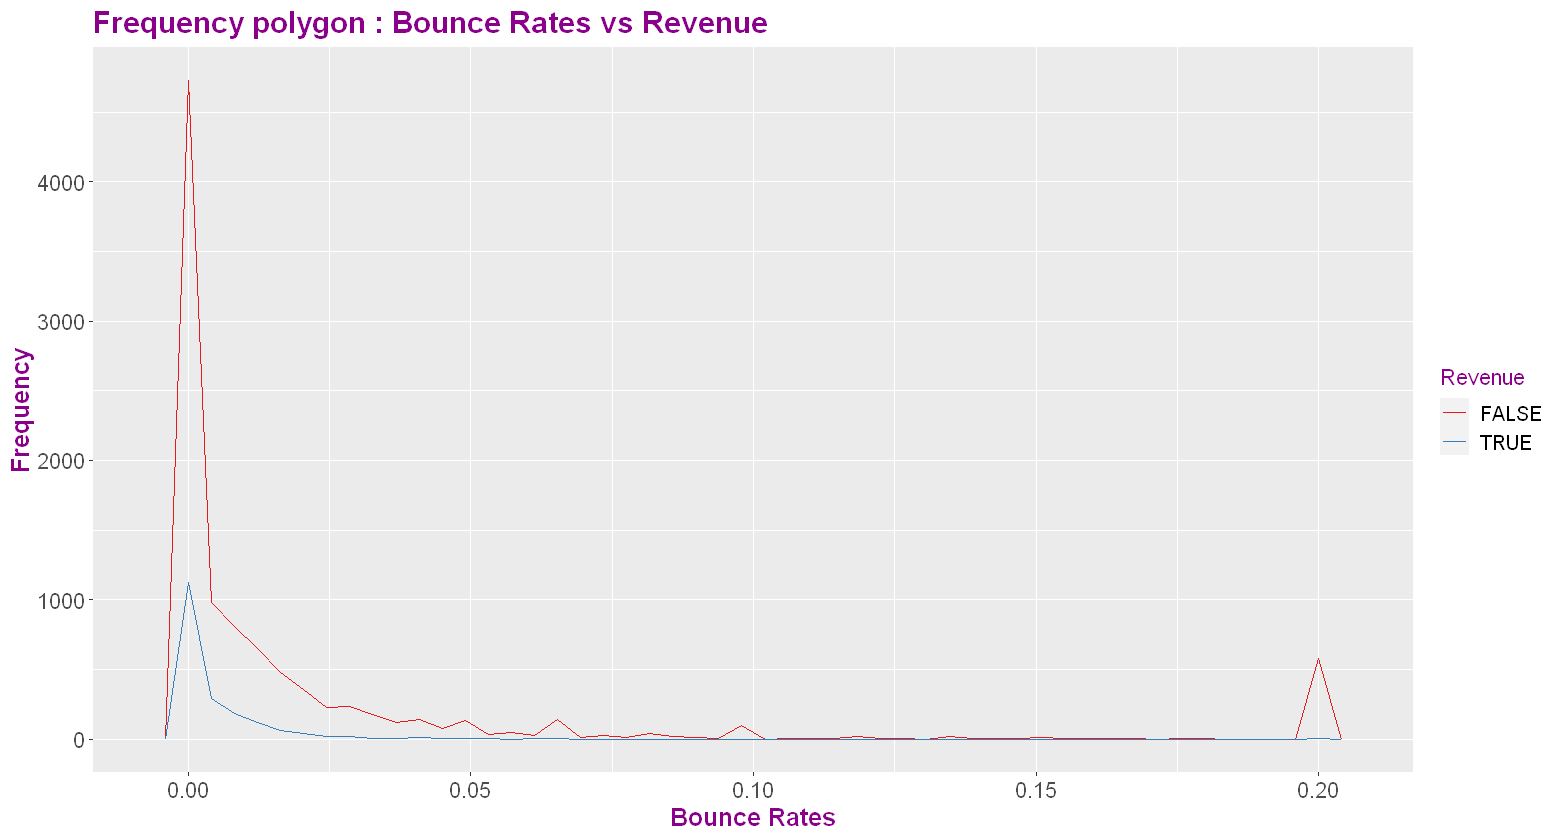

In [90]:
# Frequency polygon
library(ggplot2)
options(repr.plot.width = 13, repr.plot.height = 7)
ggplot(data = data, aes(x = BounceRates, col = Revenue))+
    geom_freqpoly(bins = 50)+
    labs(title = 'Frequency polygon : Bounce Rates vs Revenue', x = 'Bounce Rates', y = 'Frequency', fill = 'Reveue') +
        scale_color_brewer(palette = 'Set1') +
        theme(plot.title = element_text(size = 18, face = 'bold', color = 'darkmagenta'),
             axis.title.x = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.title.y = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.text.x = element_text(size = 13),
             axis.text.y = element_text(size = 13),
             legend.title = element_text(size = 13, color = 'darkmagenta'),
             legend.text = element_text(size = 12))


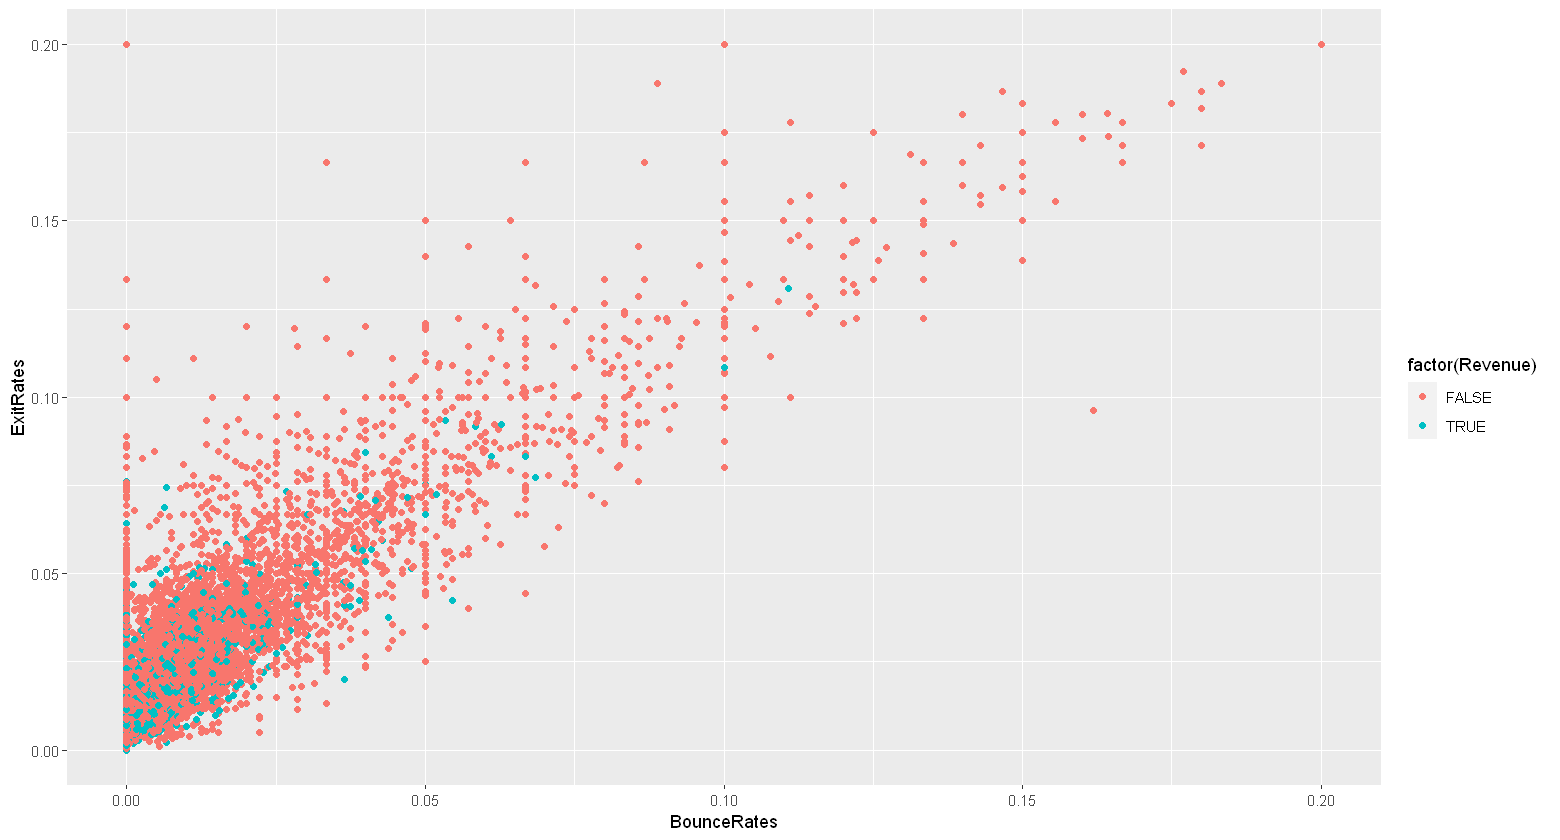

In [124]:
library(ggplot2)
ggplot(data, aes(x = BounceRates, y = ExitRates)) +
    geom_point(aes(color = factor(Revenue)))

##### Multivariate Analysis

###### Correlation Plot

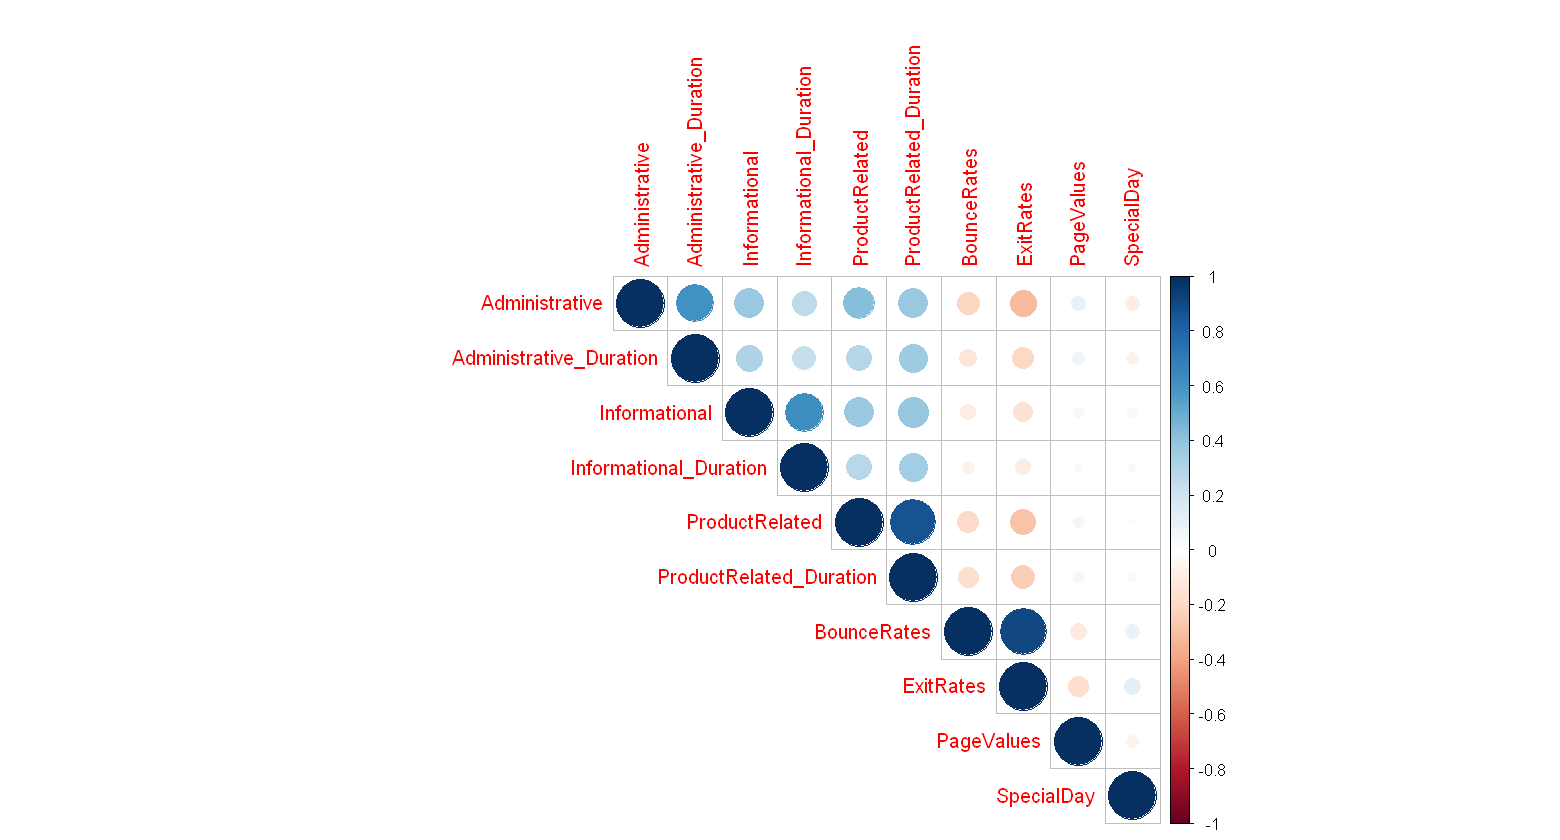

In [121]:
data.num <- num[, sapply(num, is.numeric)]
data.cor = cor(data.num)

library(corrplot)
corrplot(data.cor, type = 'upper')

Bounce rates and exit rates are highly related

###### Pair Plots

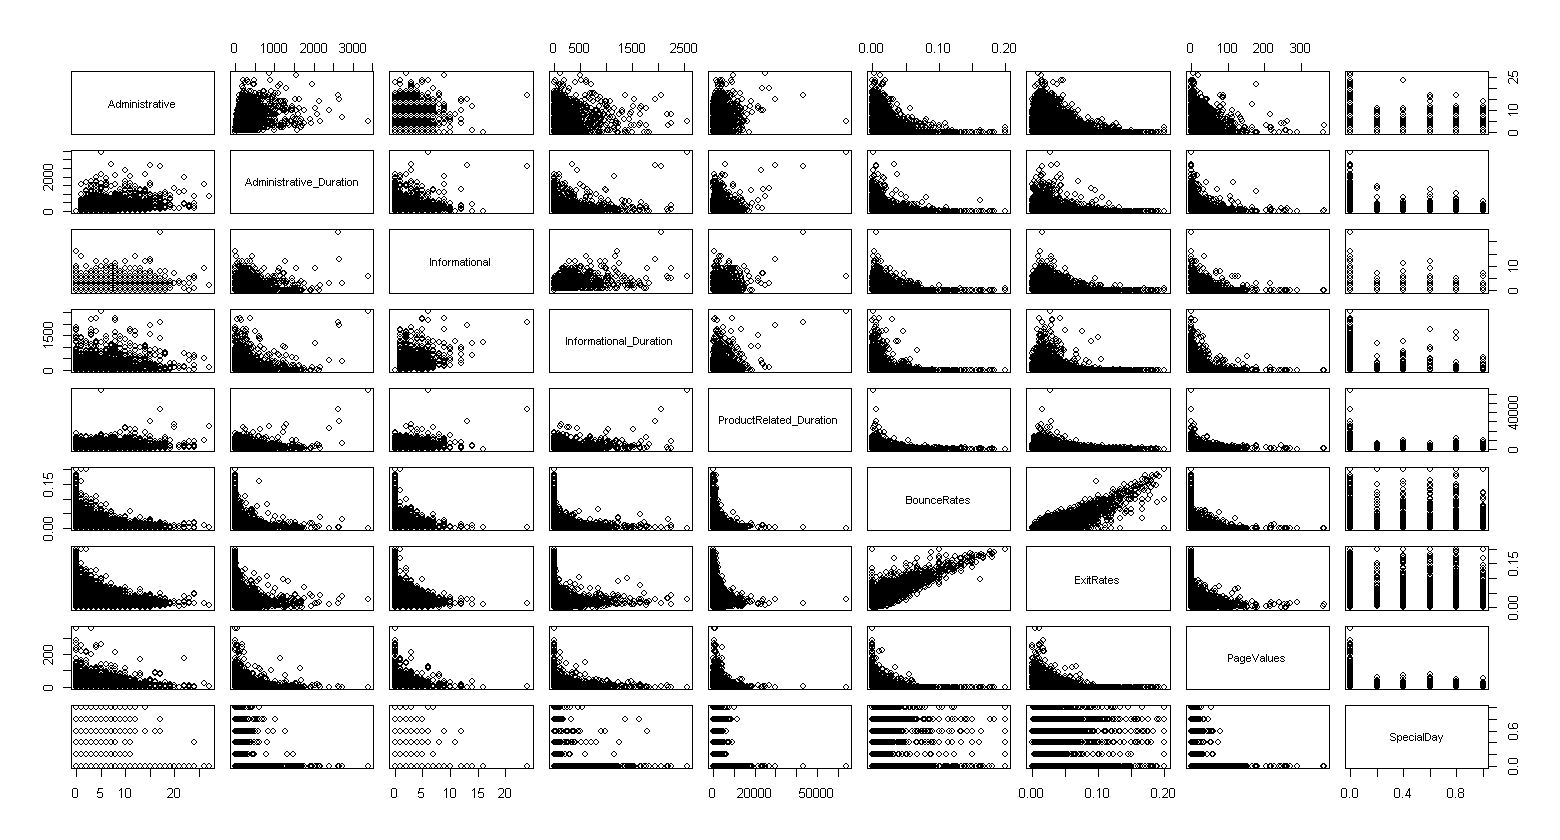

In [92]:
# pairplots
pairs(data[,c(1,2,3,4,6,7,8,9,10)])

###### PCA: Dimensionality Reduction

In [93]:
data.pca <- prcomp(data[,c(1,2,3,4,5,6,7,8,9,10)], center = TRUE,scale. = TRUE)

summary(data.pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.8376 1.2984 1.0342 1.0062 0.97066 0.96313 0.65070
Proportion of Variance 0.3377 0.1686 0.1070 0.1013 0.09422 0.09276 0.04234
Cumulative Proportion  0.3377 0.5062 0.6132 0.7145 0.80868 0.90144 0.94378
                           PC8     PC9   PC10
Standard deviation     0.59361 0.35198 0.2932
Proportion of Variance 0.03524 0.01239 0.0086
Cumulative Proportion  0.97902 0.99140 1.0000

Each of these explains a percentage of the total variation in the dataset. 

That is to say: 

PC1 explains 33.8% of the total variance

The first 5 components in relation to the other samples, can explain 80.9% of the variance.

In [94]:
str(data.pca)

List of 5
 $ sdev    : num [1:10] 1.838 1.298 1.034 1.006 0.971 ...
 $ rotation: num [1:10, 1:10] 0.383 0.33 0.349 0.298 0.412 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:10] "Administrative" "Administrative_Duration" "Informational" "Informational_Duration" ...
  .. ..$ : chr [1:10] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:10] 2.34 81.682 0.509 34.837 32.058 ...
  ..- attr(*, "names")= chr [1:10] "Administrative" "Administrative_Duration" "Informational" "Informational_Duration" ...
 $ scale   : Named num [1:10] 3.33 177.53 1.28 141.46 44.6 ...
  ..- attr(*, "names")= chr [1:10] "Administrative" "Administrative_Duration" "Informational" "Informational_Duration" ...
 $ x       : num [1:12199, 1:10] -3.36 -1.45 -3.37 -2.04 -1.03 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:12199] "1" "2" "3" "4" ...
  .. ..$ : chr [1:10] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


PCA object contains the following information:

The center point ($center), scaling ($scale), standard deviation($sdev) of each principal component

The relationship (correlation or anticorrelation, etc) between the initial variables and the principal components <span class="mark">($rotation)</span>

The values of each sample in terms of the principal components <span class="mark">($x)</span>

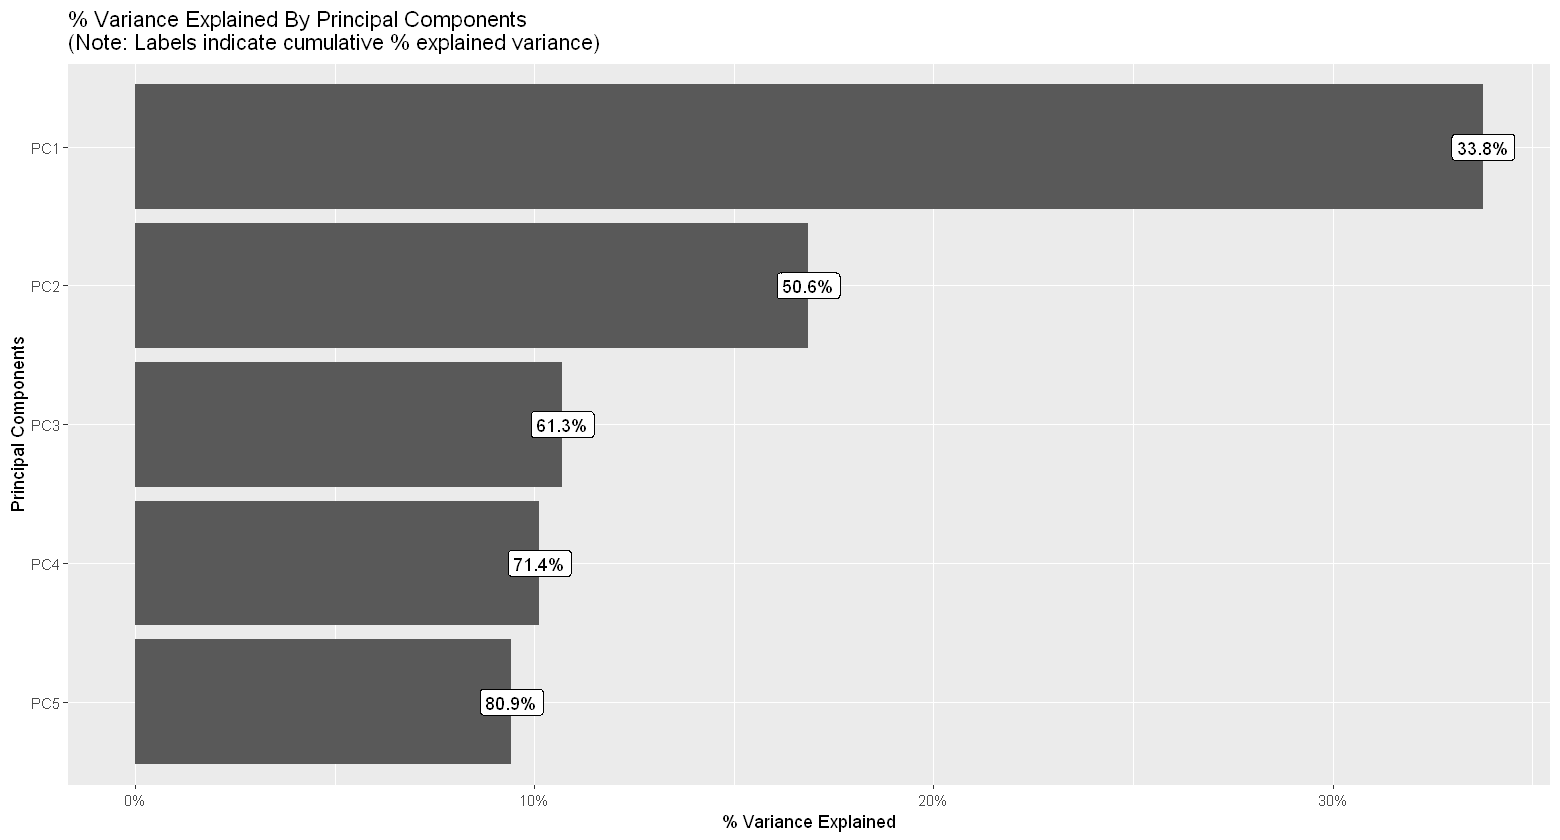

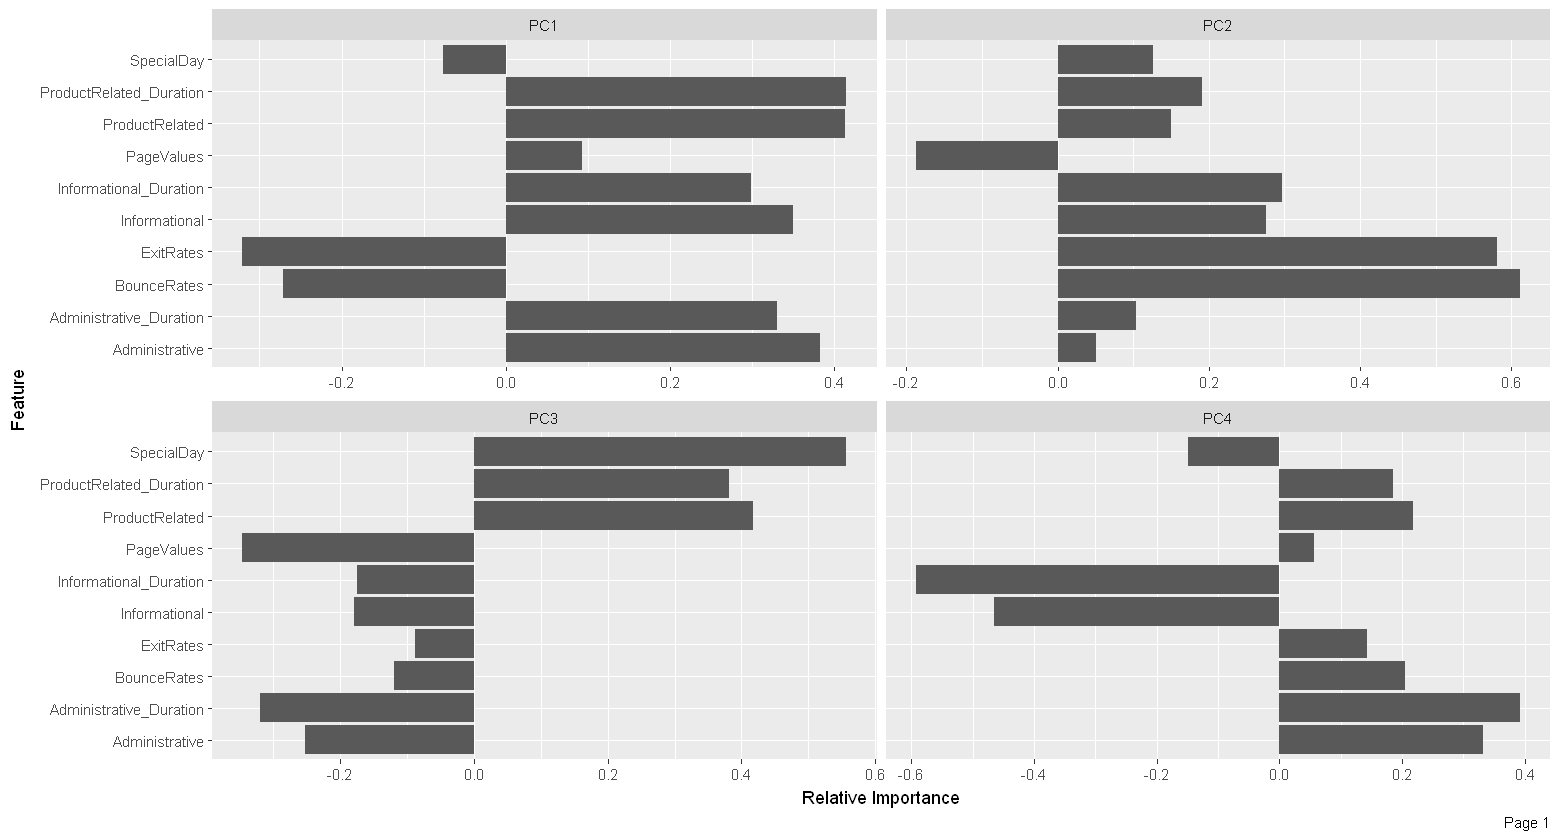

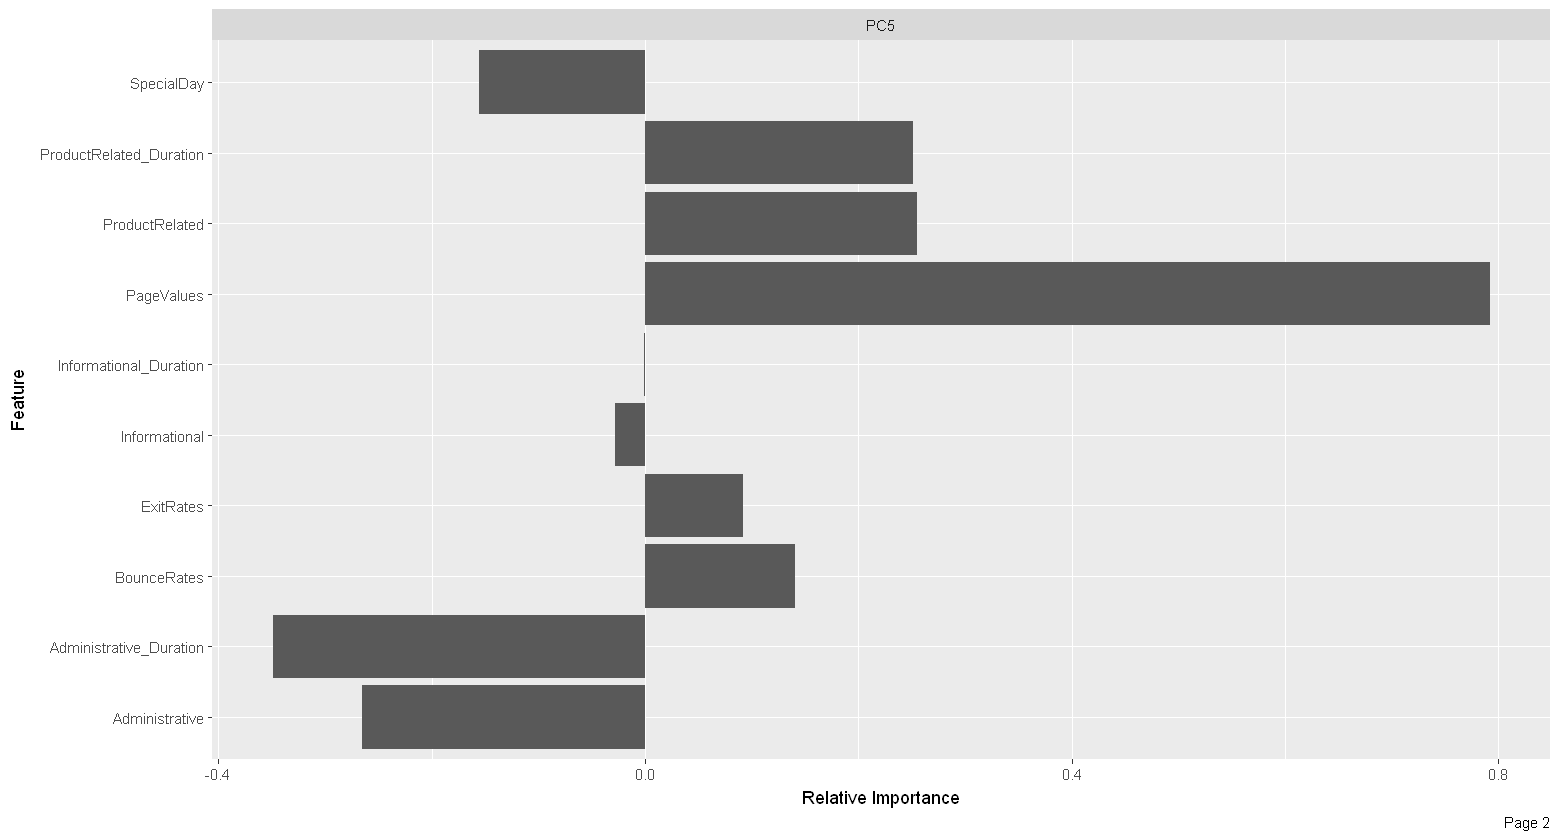

In [95]:
# Visualize PCA
plot_prcomp(num, variance_cap = 0.9, nrow = 2L, ncol = 2L)

#### Modeling
##### Implement the Solution
###### K-Means Clustering

In [96]:
b = c("OperatingSystems", "Browser", "Region", "TrafficType")
for (i in b) {
    data[, i] = as.factor(data[, i])
}

In [97]:
g = c('Month','VisitorType', 'Weekend')
for (i in g){
    data[,i] = as.numeric(data[,i])
}

In [98]:
kdata<- data[, c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)]
data.class<- data[, "Revenue"]
head(kdata)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,3,1,1,1,1,3,0
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,3,2,2,1,2,3,0
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,3,4,1,9,3,3,0
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,3,2,2,4,3,0
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,3,1,4,3,1
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,3,2,2,1,3,3,0


In [99]:
# Normalize the data
normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}

n = c(1,2,3,4,5,6,7,8,9,10)
for (i in n){
    kdata[,i] = normalize(kdata[,i])
}

head(kdata)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0002941393,0,0.0003920992,0.001418440,1.563122e-05,1.00000000,1.000000,0,0,3,1,1,1,1,3,0
0,0.0002941393,0,0.0003920992,0.002836879,1.016029e-03,0.00000000,0.500000,0,0,3,2,2,1,2,3,0
0,0.0000000000,0,0.0000000000,0.001418440,0.000000e+00,1.00000000,1.000000,0,0,3,4,1,9,3,3,0
0,0.0002941393,0,0.0003920992,0.002836879,5.731448e-05,0.25000000,0.700000,0,0,3,3,2,2,4,3,0
0,0.0002941393,0,0.0003920992,0.014184397,9.824223e-03,0.10000000,0.250000,0,0,3,3,3,1,4,3,1
0,0.0002941393,0,0.0003920992,0.026950355,2.426226e-03,0.07894737,0.122807,0,0,3,2,2,1,3,3,0


In [101]:
# Applying the K-means clustering algorithm with no. of centroids(k)=3
# ---
# 
result <- kmeans(kdata,2)

In [102]:
# Previewing the no. of records in each cluster
# 
result$size 

[1] 10116  2083

In [103]:
result$centers

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0.08831993,0.02453583,0.02185482,0.01451443,0.04622647,0.0191122,0.09381286,0.1992468,0.01639978,0.06202056,6.141459,2.069790,2.321965,3.129300,2.446619,2.719158,0.2311190
0.07864369,0.02327224,0.01802288,0.01180502,0.04181367,0.0178136,0.14312901,0.2474870,0.01671795,0.06173788,6.296687,2.389342,2.533845,3.269803,11.980797,2.699472,0.2486798


In [104]:
result$cluster

1     2     3     4     5     6     7     8     9    10    11    12    13 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  157   158   160   161   162   163   164   165   166   167   168   169   170 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  171   172   173   174   175   176   177   178   180   181   182   183   184 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  185   186   187   188   189   190   191   192   193   194   195   196   197 
    2     1     1     1     1     1     1     1     1     1     1     1     1 
  198   199   200   201   202   203   204   205   206   207   208   209   210 
    1     1     1     2     2     1     2     2     1     1     1     1     1 
  211   212   213   214   215   216   217   218   219   220   221   222   223 
    1     1     2     1     1     1     1     1     1     2     1     1     1 
  224   225   226   227   228   229   230   231   232   233   234   235   236 
    2     1     2     1     1     1     1     2     1     1     1     1     1 
  237   238   239   240   241   242   243   244   245   246   247   248   249 
    2     1     1     1     1     1     1     1     1     1     1     1     1 
  250   251   252   253   254   255   256   257   258   259   260   261   262 
    1     1     1     1     1     1     1     1     2     1     2     1     1 
  263   264   265   266   267   268   269   270   271   272   273   274   275 
    1     1     1     1     1     2     1     1     1     1     2     1     2 
  276   277   278   279   280   281   282   283   284   285   286   287   288 
    1     1     1     1     1     1     2     1     1     1     1     1     1 
  289   290   291   292   293   294   295   296   297   298   299   300   301 
    1     2     1     1     1     1     1     1     1     1     1     1     2 
  302   303   304   305   306   307   308   309   310   311   312   313   314 
    1     1     1     1     1     1     1     2     2     2     1     1     1 
  315   316   317   318   319   320   321   322   323   324   325   326   327 
    1     1     1     2     1     1     1     1     1     1     1     1     1 
  328   329   330   331   332   333   334   335   336 

In [105]:
k_data <- as.numeric(data.class)
table(result$cluster, k_data)

   k_data
       0    1
  1 8541 1575
  2 1750  333

In [106]:
mean(k_data == result$cluster)

[1] 0.1291089

Gives a 13% accuracy

##### Challenge the Solution
###### Heirarchical Clustering

In [107]:
# Calculating euclidean distances of the independent variables.

d <- dist(kdata, method = "euclidean")

In [108]:
# using the hclust clustering method.
h_model <- hclust(d, method = "ward.D2" )

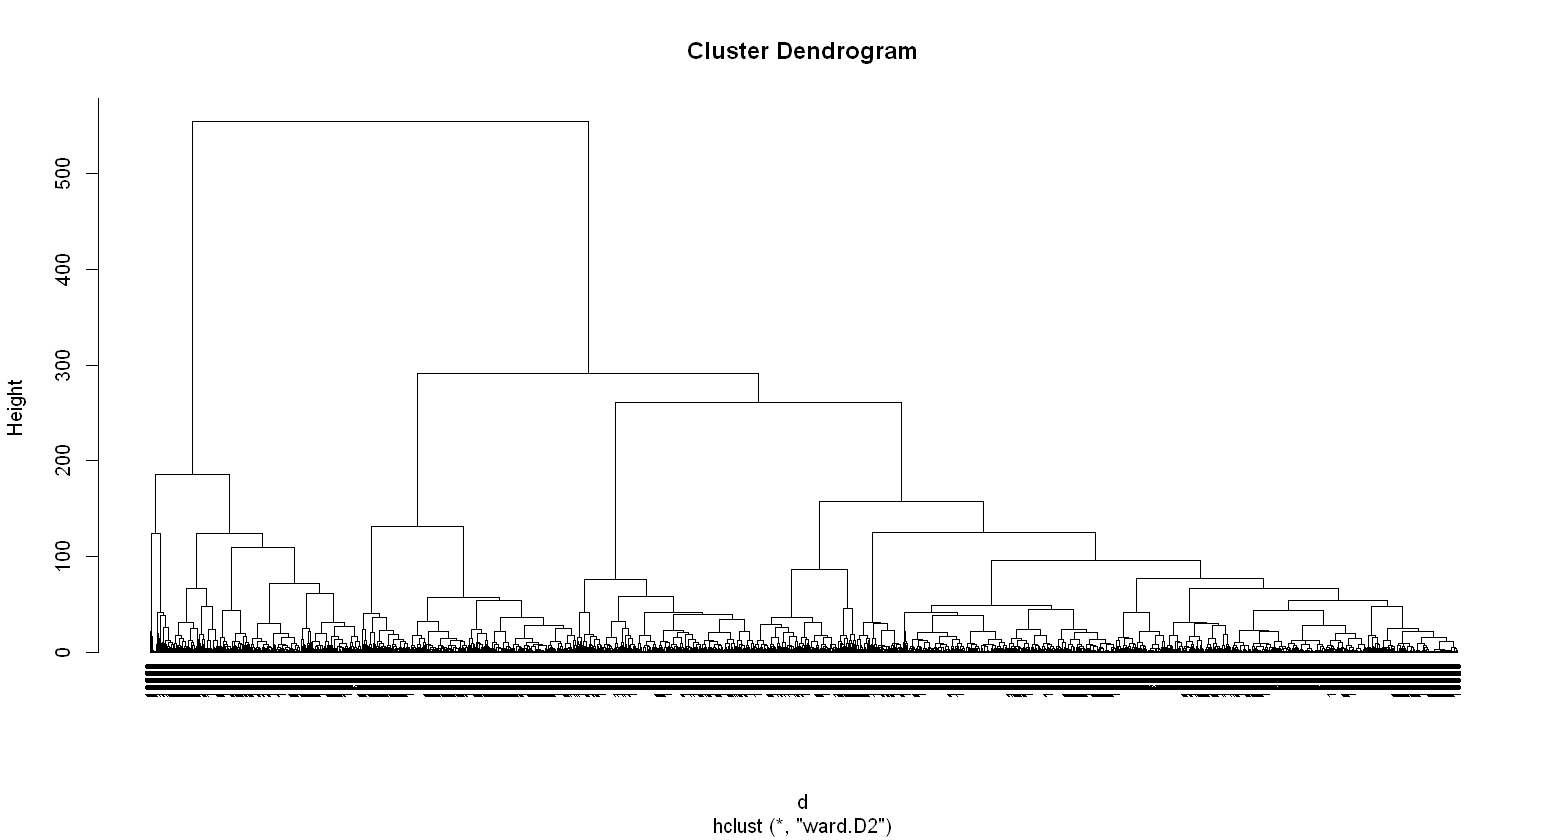

In [109]:
# plotting the dendogram
plot(h_model, cex = 0.6, hang = -1)

In [110]:
# Cut tree into 2 groups.
sub_group = cutree (h_model, k = 2)
table (sub_group)

sub_group
    1     2 
10224  1975 

In [112]:
table (sub_group, data.class)

         data.class
sub_group FALSE TRUE
        1  8602 1622
        2  1689  286

In [113]:
#checking accuracy
mean(sub_group == data.class)

[1] 0.1329617

Doesn't give much difference: Still 13% accuracy

###### DBSCAN Clustering

In [114]:
install.packages('dbscan')

Installing package into 'C:/Users/lggat/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'dbscan' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lggat\AppData\Local\Temp\Rtmp0Srl1r\downloaded_packages


In [115]:
# Loading the required library
library("dbscan")

# Applying our DBSCAN algorithm
# using a minimum of 4 points with in a distance of eps(0.4)
# 
l = c('OperatingSystems','Browser','Region','TrafficType')
for (i in l){
    kdata[,i] = as.numeric(kdata[,i])
}

db_model <- dbscan(kdata,eps=0.4,MinPts = 4)


Warning message:
"package 'dbscan' was built under R version 3.6.3"
Attaching package: 'dbscan'

The following object is masked from 'package:VIM':

    kNN

Warning message in dbscan(kdata, eps = 0.4, MinPts = 4):
"converting argument MinPts (fpc) to minPts (dbscan)!"

In [116]:
print(db_model)

DBSCAN clustering for 12199 objects.
Parameters: eps = 0.4, minPts = 4
The clustering contains 633 cluster(s) and 5901 noise points.

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
5901    5   10    7    4   12   30   19   88   15   45   19   59    5    9   10 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
   4    6    6   25    6    8   25    8    5    7   10    8   10    5    7   14 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
   9   14   11    4   12   17   10    4    9   14   27   19   26    6    5    7 
  48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
   4   16    8   13    9    9   12    9    9    5    6    5    5    5    7    5 
  64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79 
   4    7    6    5    7    4   11    4    7    7    4   12    4    5    4    5 
  80   81   82   83   84   85   86   87   88   89   90  

Warning message in hullplot(kdata, db_model$cluster):
"Not enough colors. Some colors will be reused."

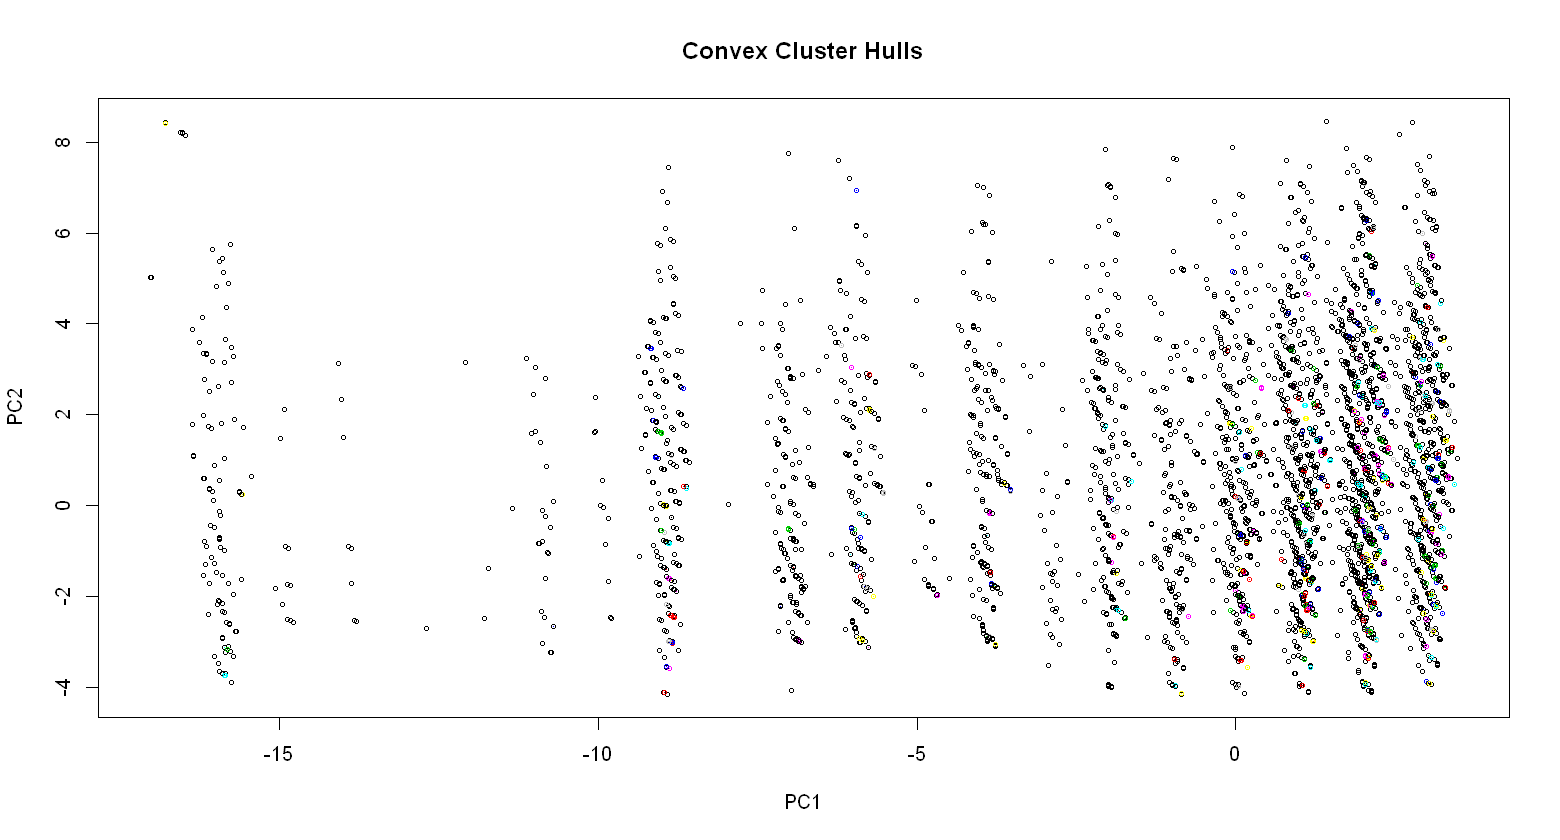

In [117]:
hullplot(kdata,db_model$cluster)